
===== INICIANDO ENTRENAMIENTO =====
Ecuación: dP/dt = 0.5P
Condición inicial: P(0) = 1.0
Arquitectura: [32, 32] con activación Tanh
Épocas: 5000
Puntos de colocación: 100



Entrenamiento:   0%|          | 14/5000 [00:00<00:36, 137.64it/s]

Época 1/5000 - Pérdida: 5.302280e-01, MAE: 5.185389e+00, MSE: 4.376103e+01
LR: 9.999999e-04, Error Máx: 1.456223e+01


Entrenamiento:  11%|█         | 537/5000 [00:02<00:12, 350.48it/s]

Época 500/5000 - Pérdida: 4.867507e-03, MAE: 2.460697e-01, MSE: 9.706692e-02
LR: 9.755283e-04, Error Máx: 7.251072e-01


Entrenamiento:  22%|██▏       | 1078/5000 [00:03<00:10, 380.88it/s]

Época 1000/5000 - Pérdida: 1.740109e-04, MAE: 1.238320e-02, MSE: 2.443137e-04
LR: 9.045085e-04, Error Máx: 3.384209e-02


Entrenamiento:  31%|███▏      | 1564/5000 [00:04<00:08, 384.69it/s]

Época 1500/5000 - Pérdida: 1.849589e-05, MAE: 2.808007e-03, MSE: 1.272380e-05
LR: 7.938926e-04, Error Máx: 7.232666e-03


Entrenamiento:  41%|████      | 2041/5000 [00:05<00:07, 384.63it/s]

Época 2000/5000 - Pérdida: 2.502582e-06, MAE: 5.114333e-04, MSE: 4.237516e-07
LR: 6.545085e-04, Error Máx: 1.507759e-03


Entrenamiento:  51%|█████     | 2560/5000 [00:07<00:06, 367.95it/s]

Época 2500/5000 - Pérdida: 1.943647e-06, MAE: 2.431941e-04, MSE: 1.025464e-07
LR: 5.000000e-04, Error Máx: 8.316040e-04


Entrenamiento:  61%|██████    | 3051/5000 [00:08<00:05, 375.72it/s]

Época 3000/5000 - Pérdida: 1.872835e-06, MAE: 2.365537e-04, MSE: 8.740076e-08
LR: 3.454915e-04, Error Máx: 6.990433e-04


Entrenamiento:  71%|███████   | 3540/5000 [00:10<00:05, 281.68it/s]

Época 3500/5000 - Pérdida: 1.834971e-06, MAE: 2.355375e-04, MSE: 8.408429e-08
LR: 2.061074e-04, Error Máx: 6.532669e-04


Entrenamiento:  81%|████████▏ | 4074/5000 [00:12<00:02, 364.38it/s]

Época 4000/5000 - Pérdida: 1.810482e-06, MAE: 2.344255e-04, MSE: 8.220772e-08
LR: 9.549150e-05, Error Máx: 6.313324e-04


Entrenamiento:  91%|█████████ | 4537/5000 [00:13<00:01, 364.25it/s]

Época 4500/5000 - Pérdida: 1.799164e-06, MAE: 2.337391e-04, MSE: 8.129426e-08
LR: 2.447174e-05, Error Máx: 6.208420e-04


Entrenamiento: 100%|██████████| 5000/5000 [00:14<00:00, 337.60it/s]


Época 5000/5000 - Pérdida: 1.797481e-06, MAE: 2.336893e-04, MSE: 8.133991e-08
LR: 0.000000e+00, Error Máx: 6.227493e-04

=== INFORME DE RESULTADOS ===
Tiempo de entrenamiento: 14.82 segundos
Modelo adecuado para la ecuación: ✓ Sí

Tabla de errores finales:
           Métrica  Valor Final  Promedio (últimas 100 épocas)
               MAE 2.336893e-04                   2.336969e-04
               MSE 8.133991e-08                   8.135190e-08
Error Máx Absoluto 6.227493e-04                   6.227303e-04

Criterios de aceptación:
- MAE: ✓ Cumple (límite: 1.00e-03, obtenido: 2.34e-04)
- MSE: ✓ Cumple (límite: 1.00e-04, obtenido: 8.14e-08)
- Error Máx Absoluto: ✓ Cumple (límite: 1.00e-03, obtenido: 6.23e-04)

Tabla de convergencia numérica:
 Época      Pérdida          MAE          MSE    Error Máx
     1 5.302280e-01 5.185389e+00 4.376103e+01 1.456223e+01
   101 9.258838e-02 2.265784e+00 8.263671e+00 6.734738e+00
   501 4.822738e-03 2.442897e-01 9.566676e-02 7.198267e-01
  1001 1.734285e

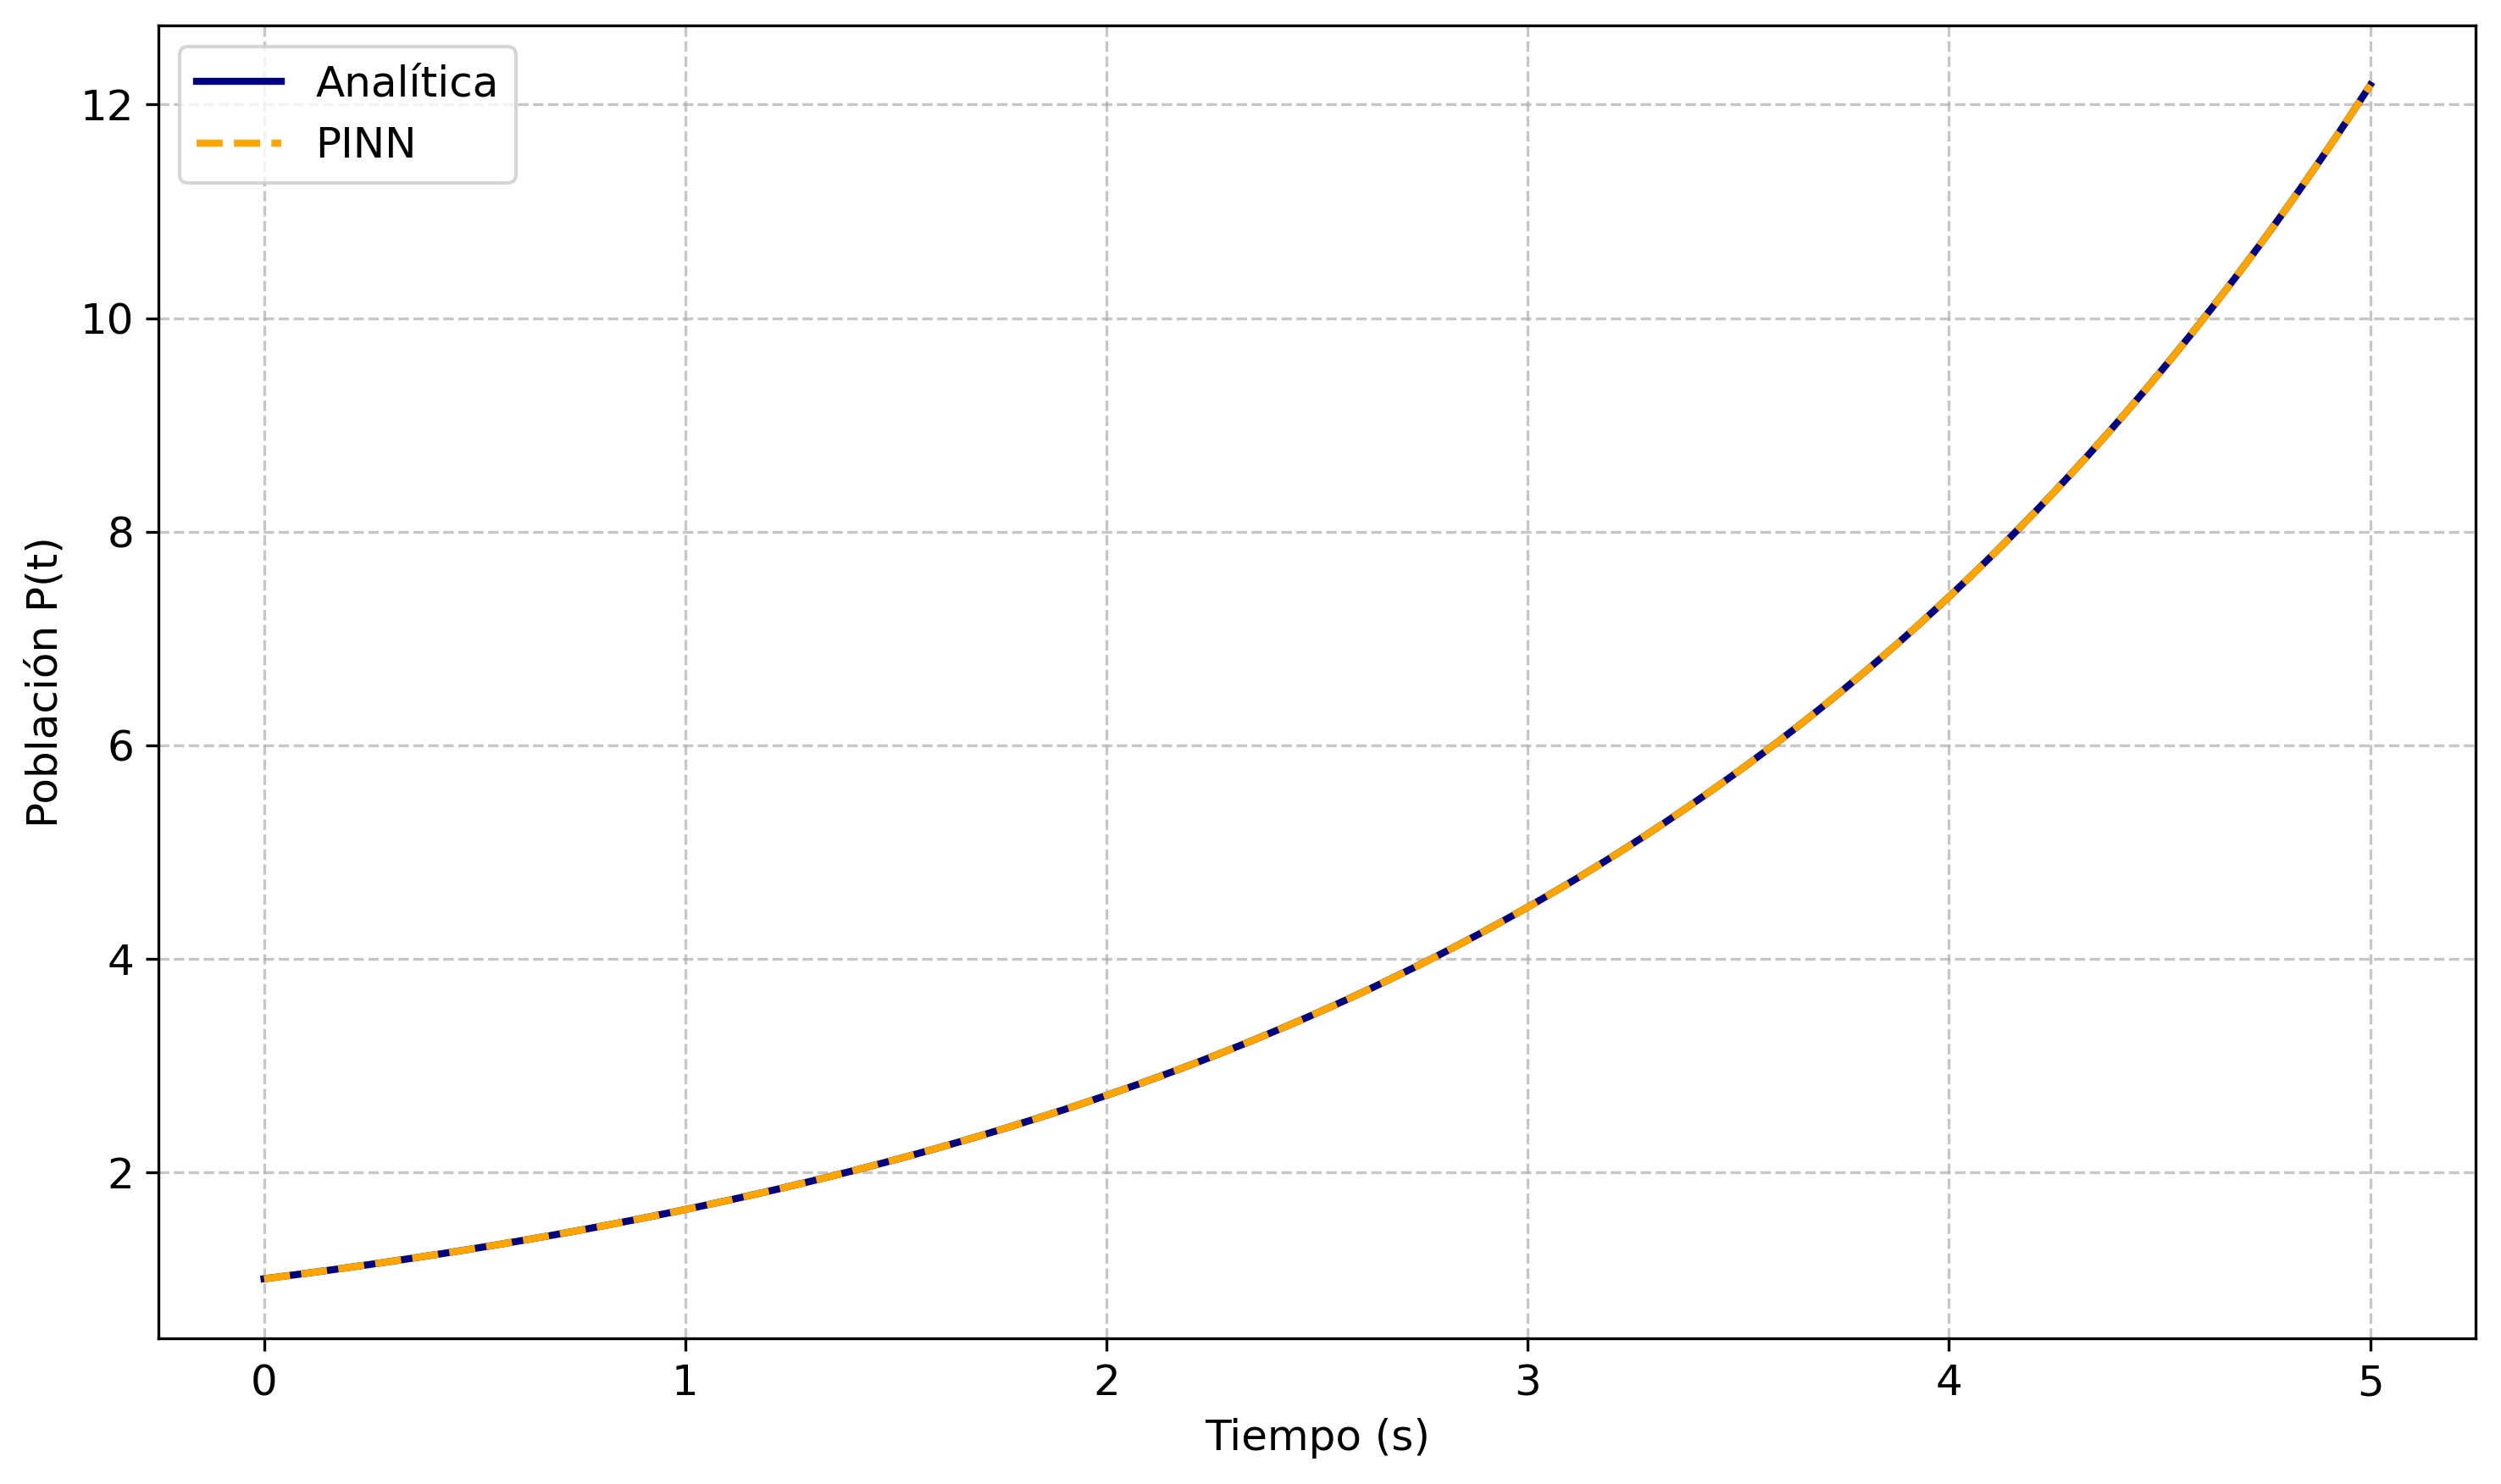

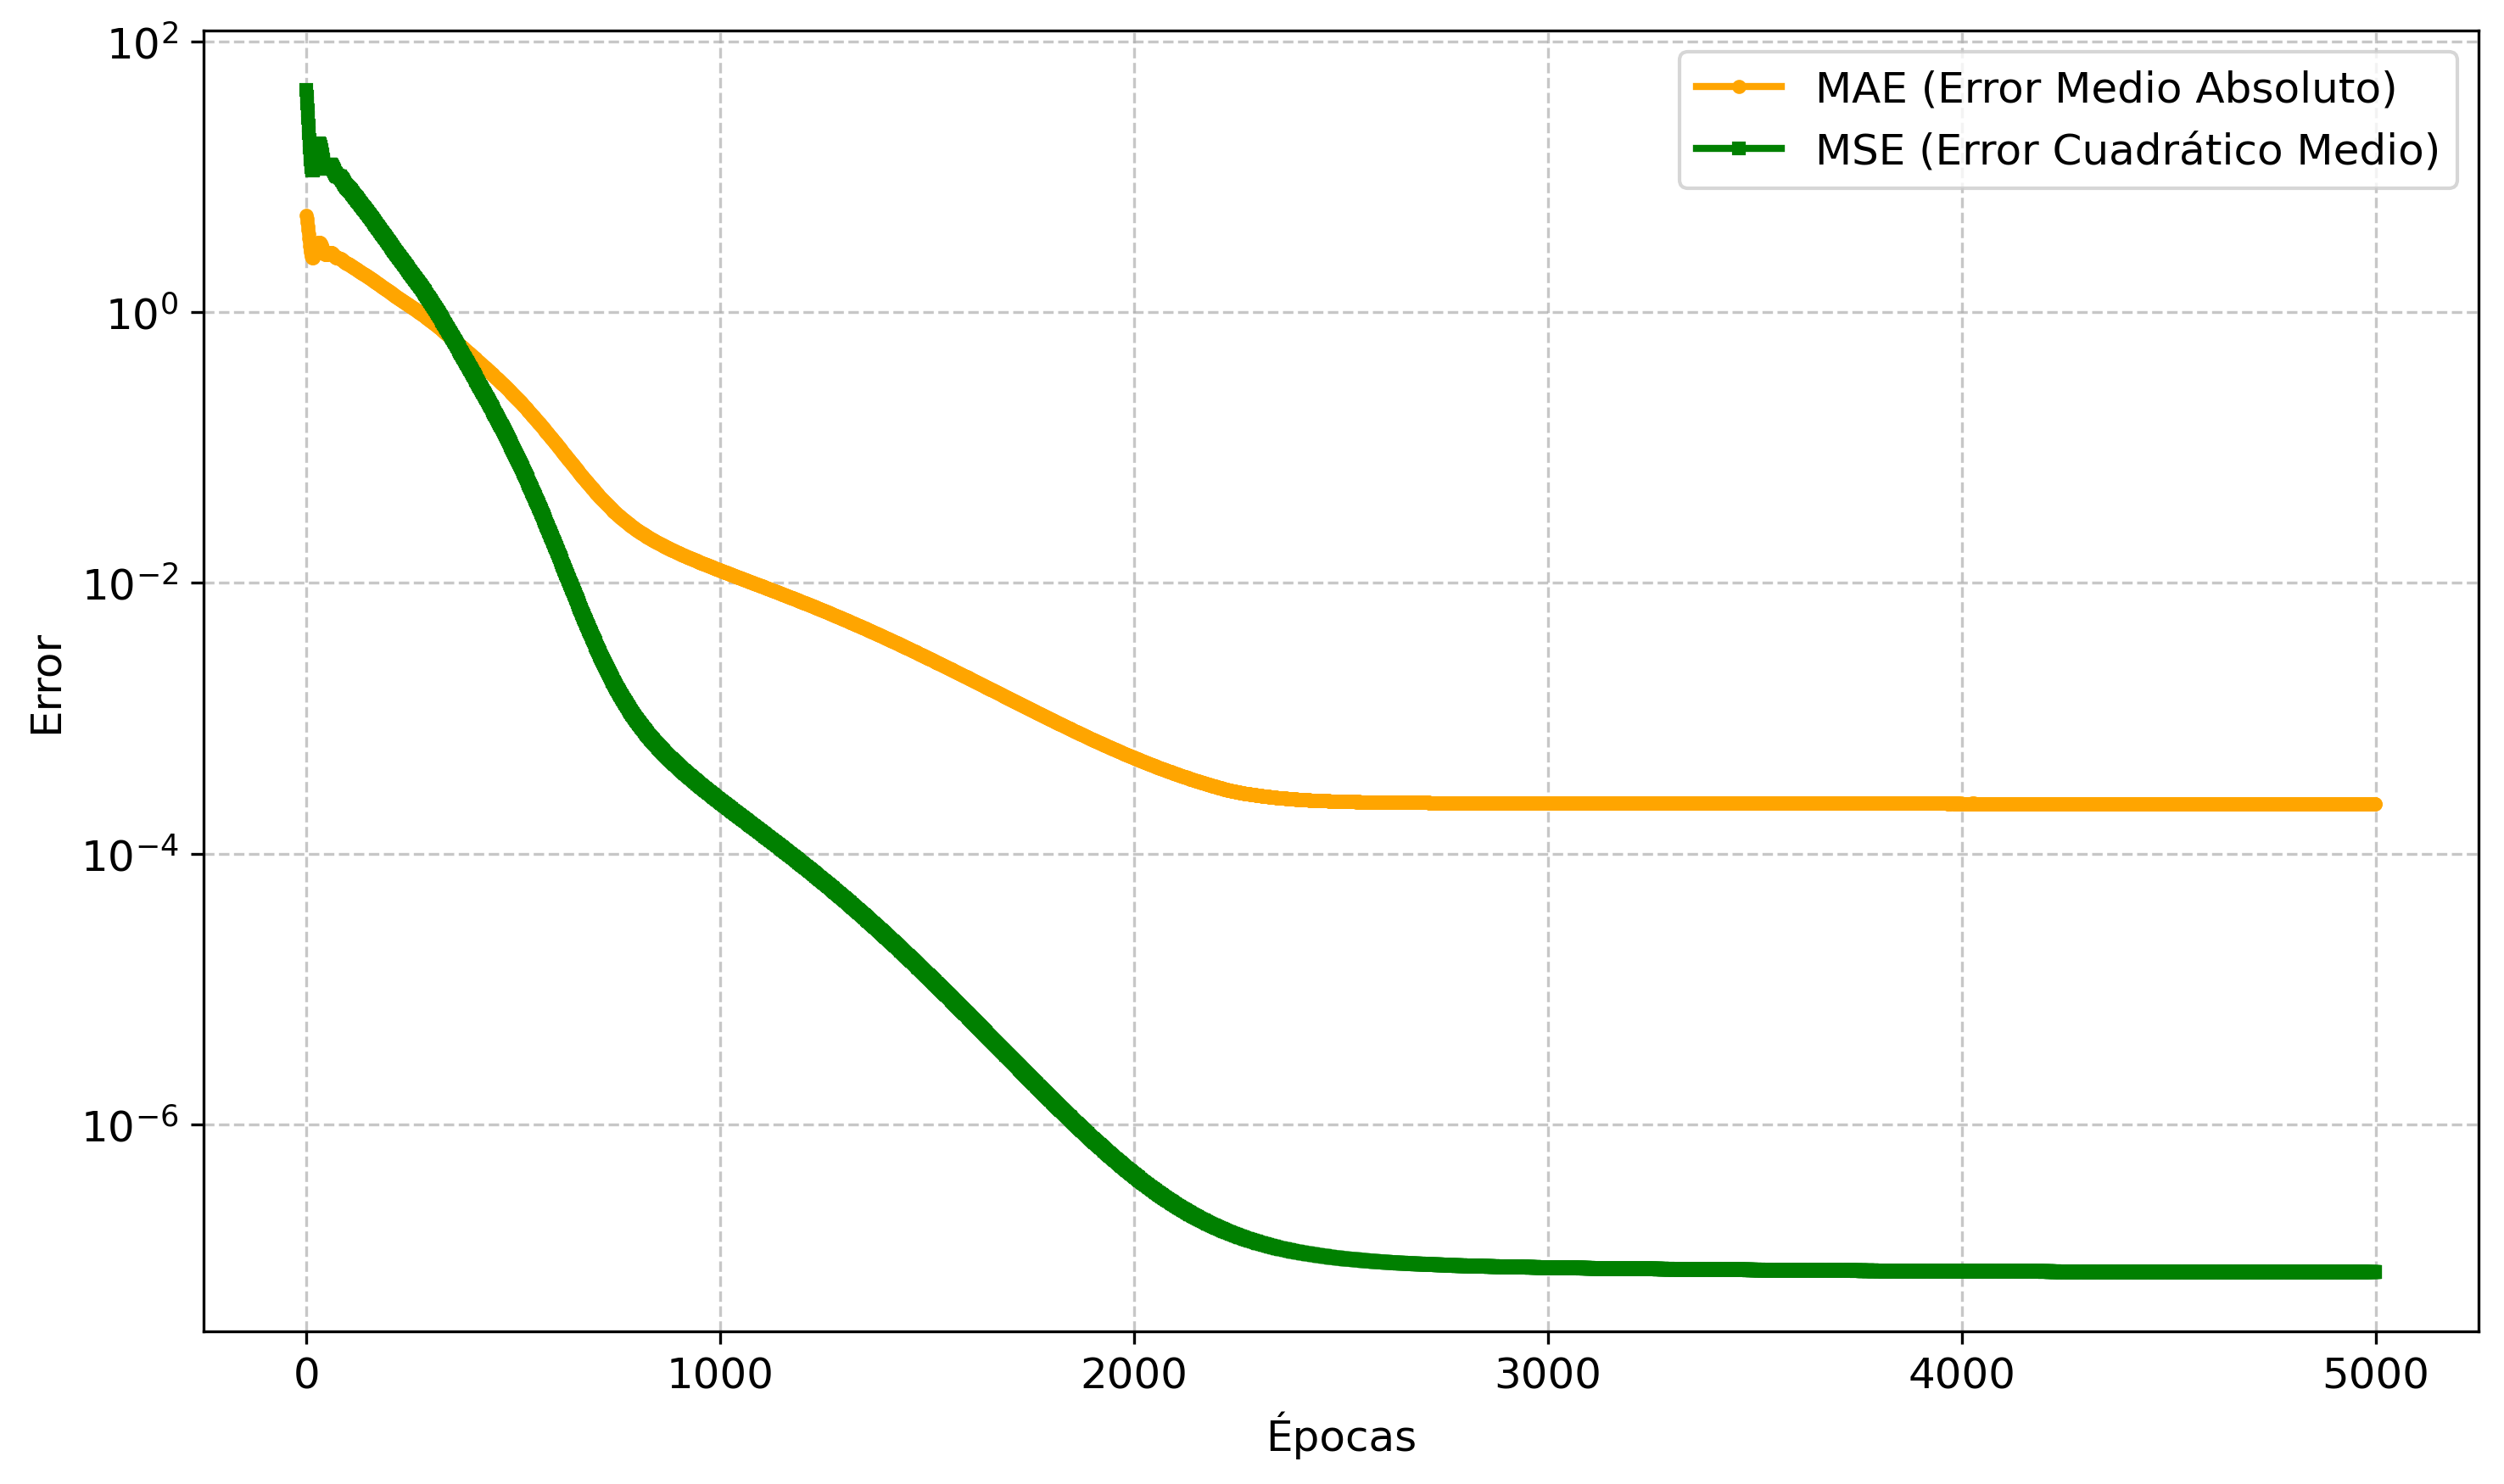

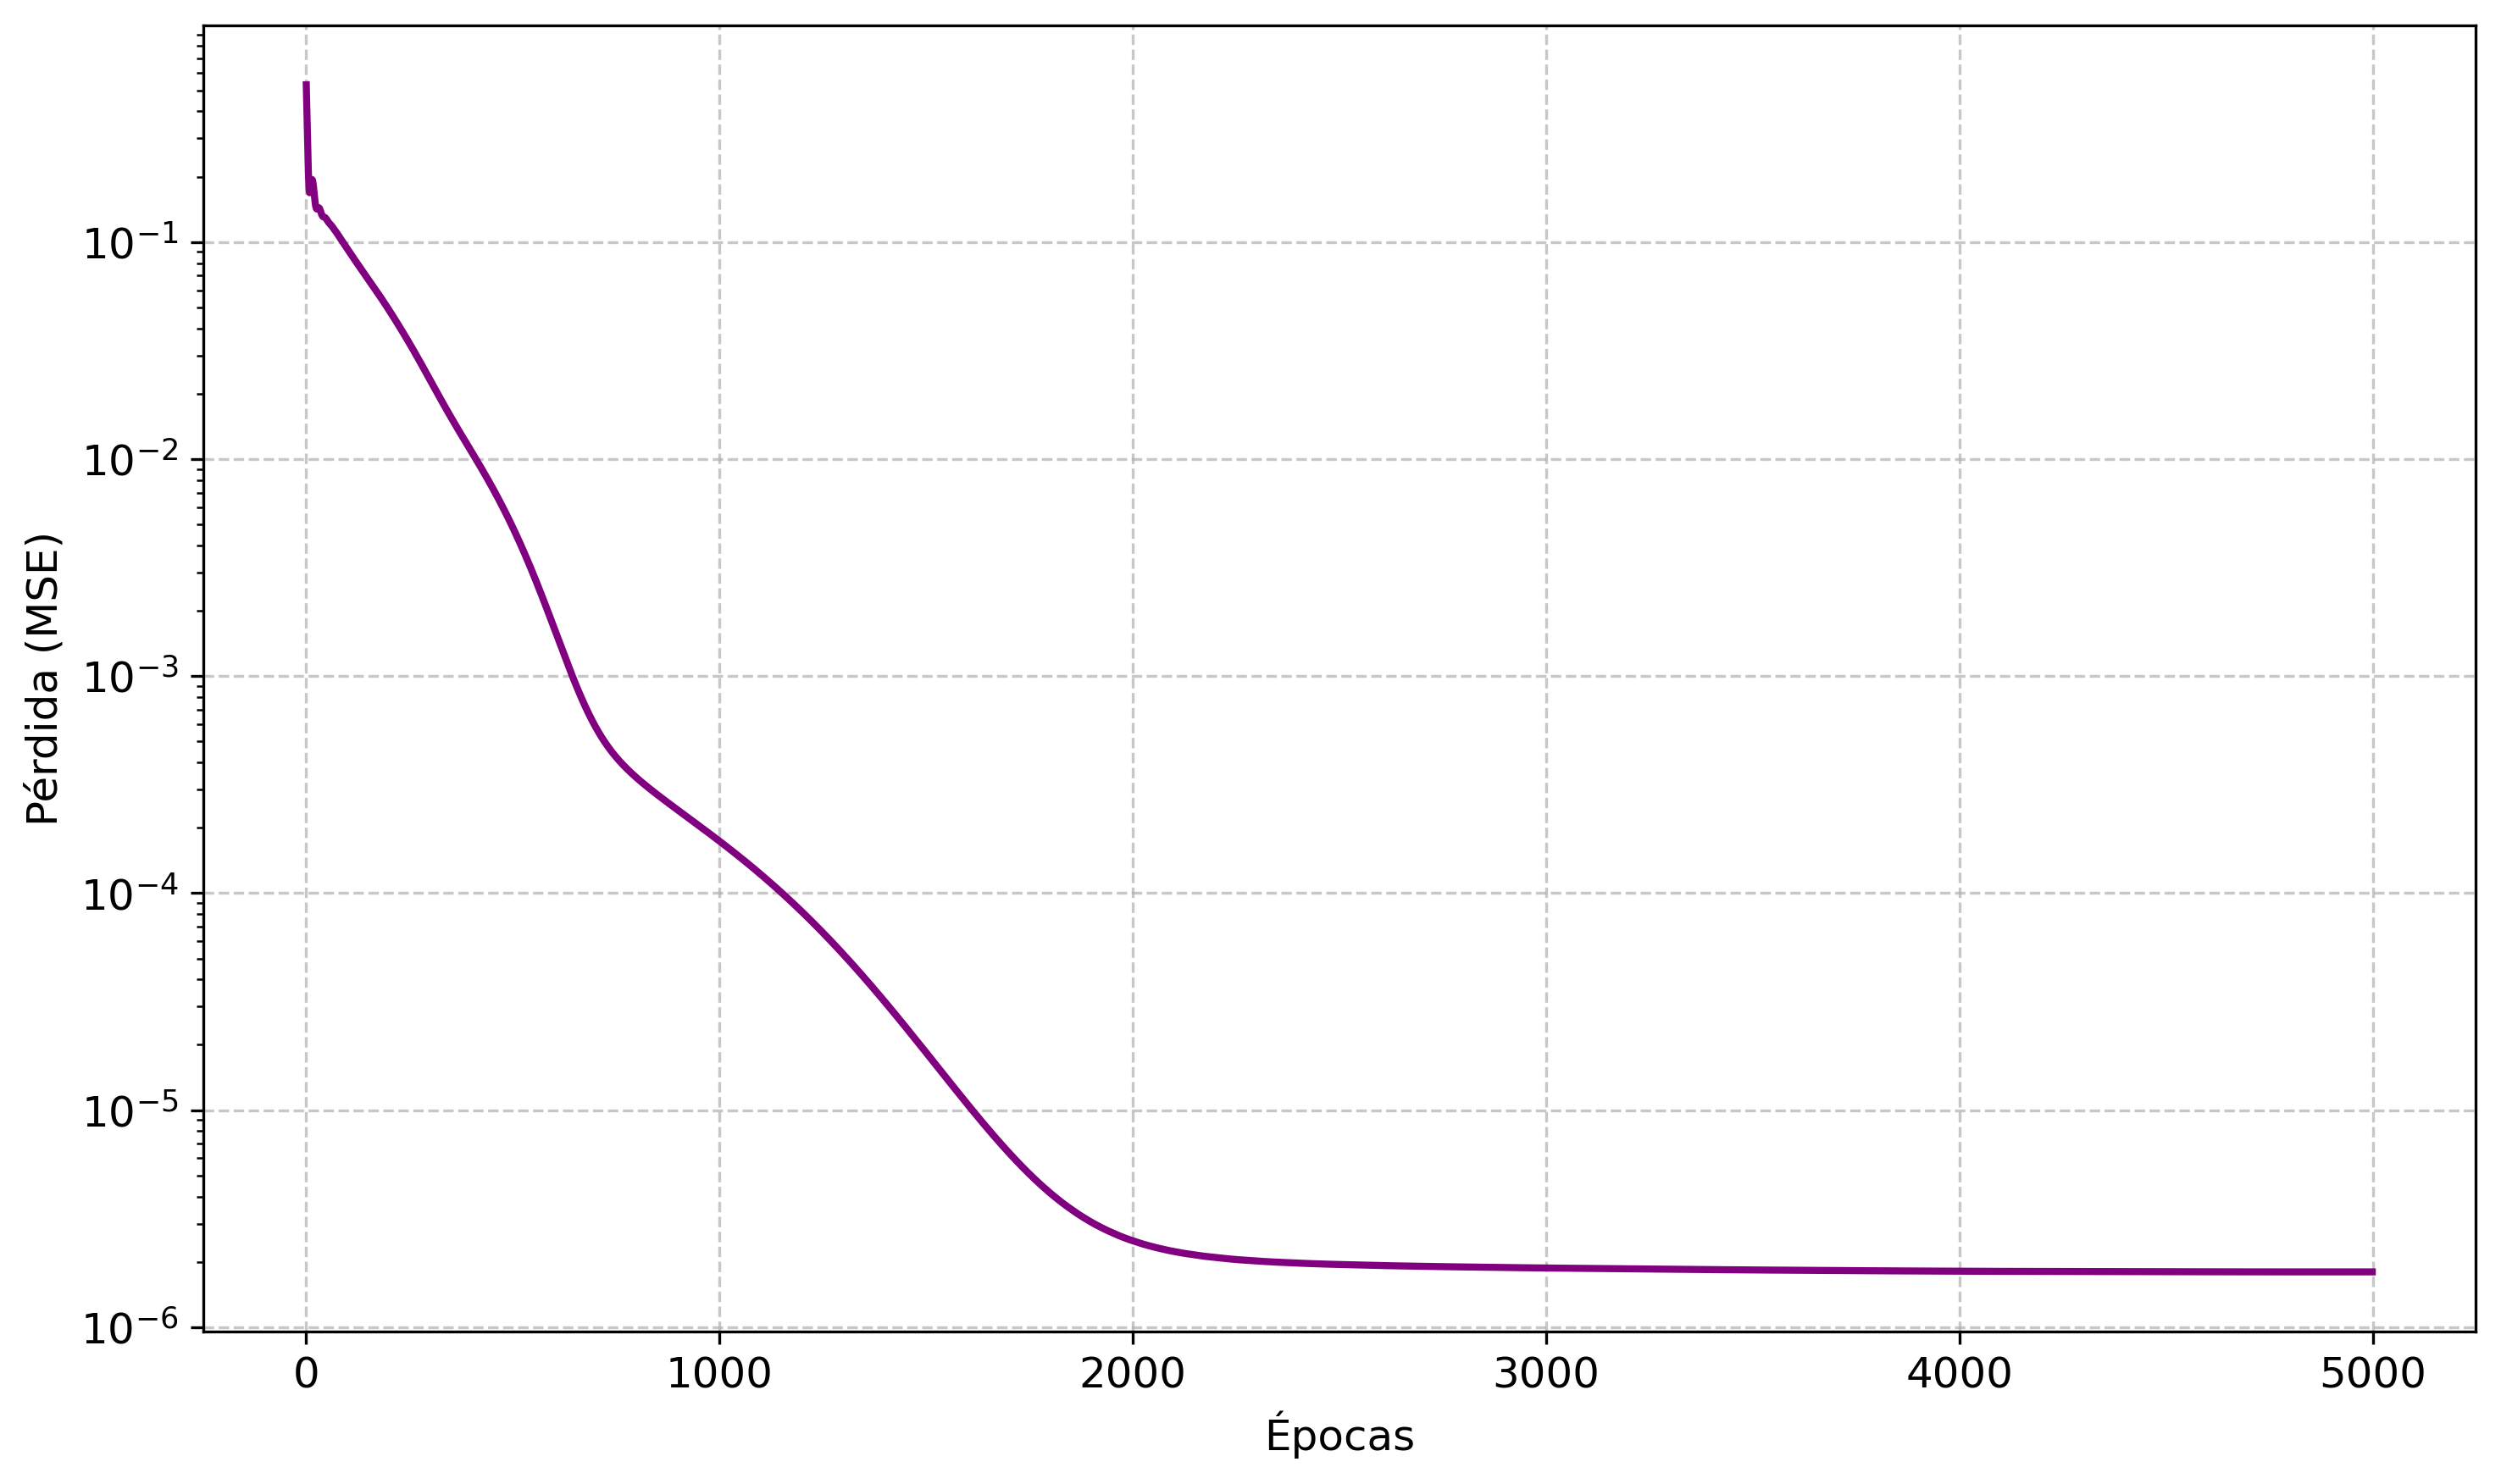

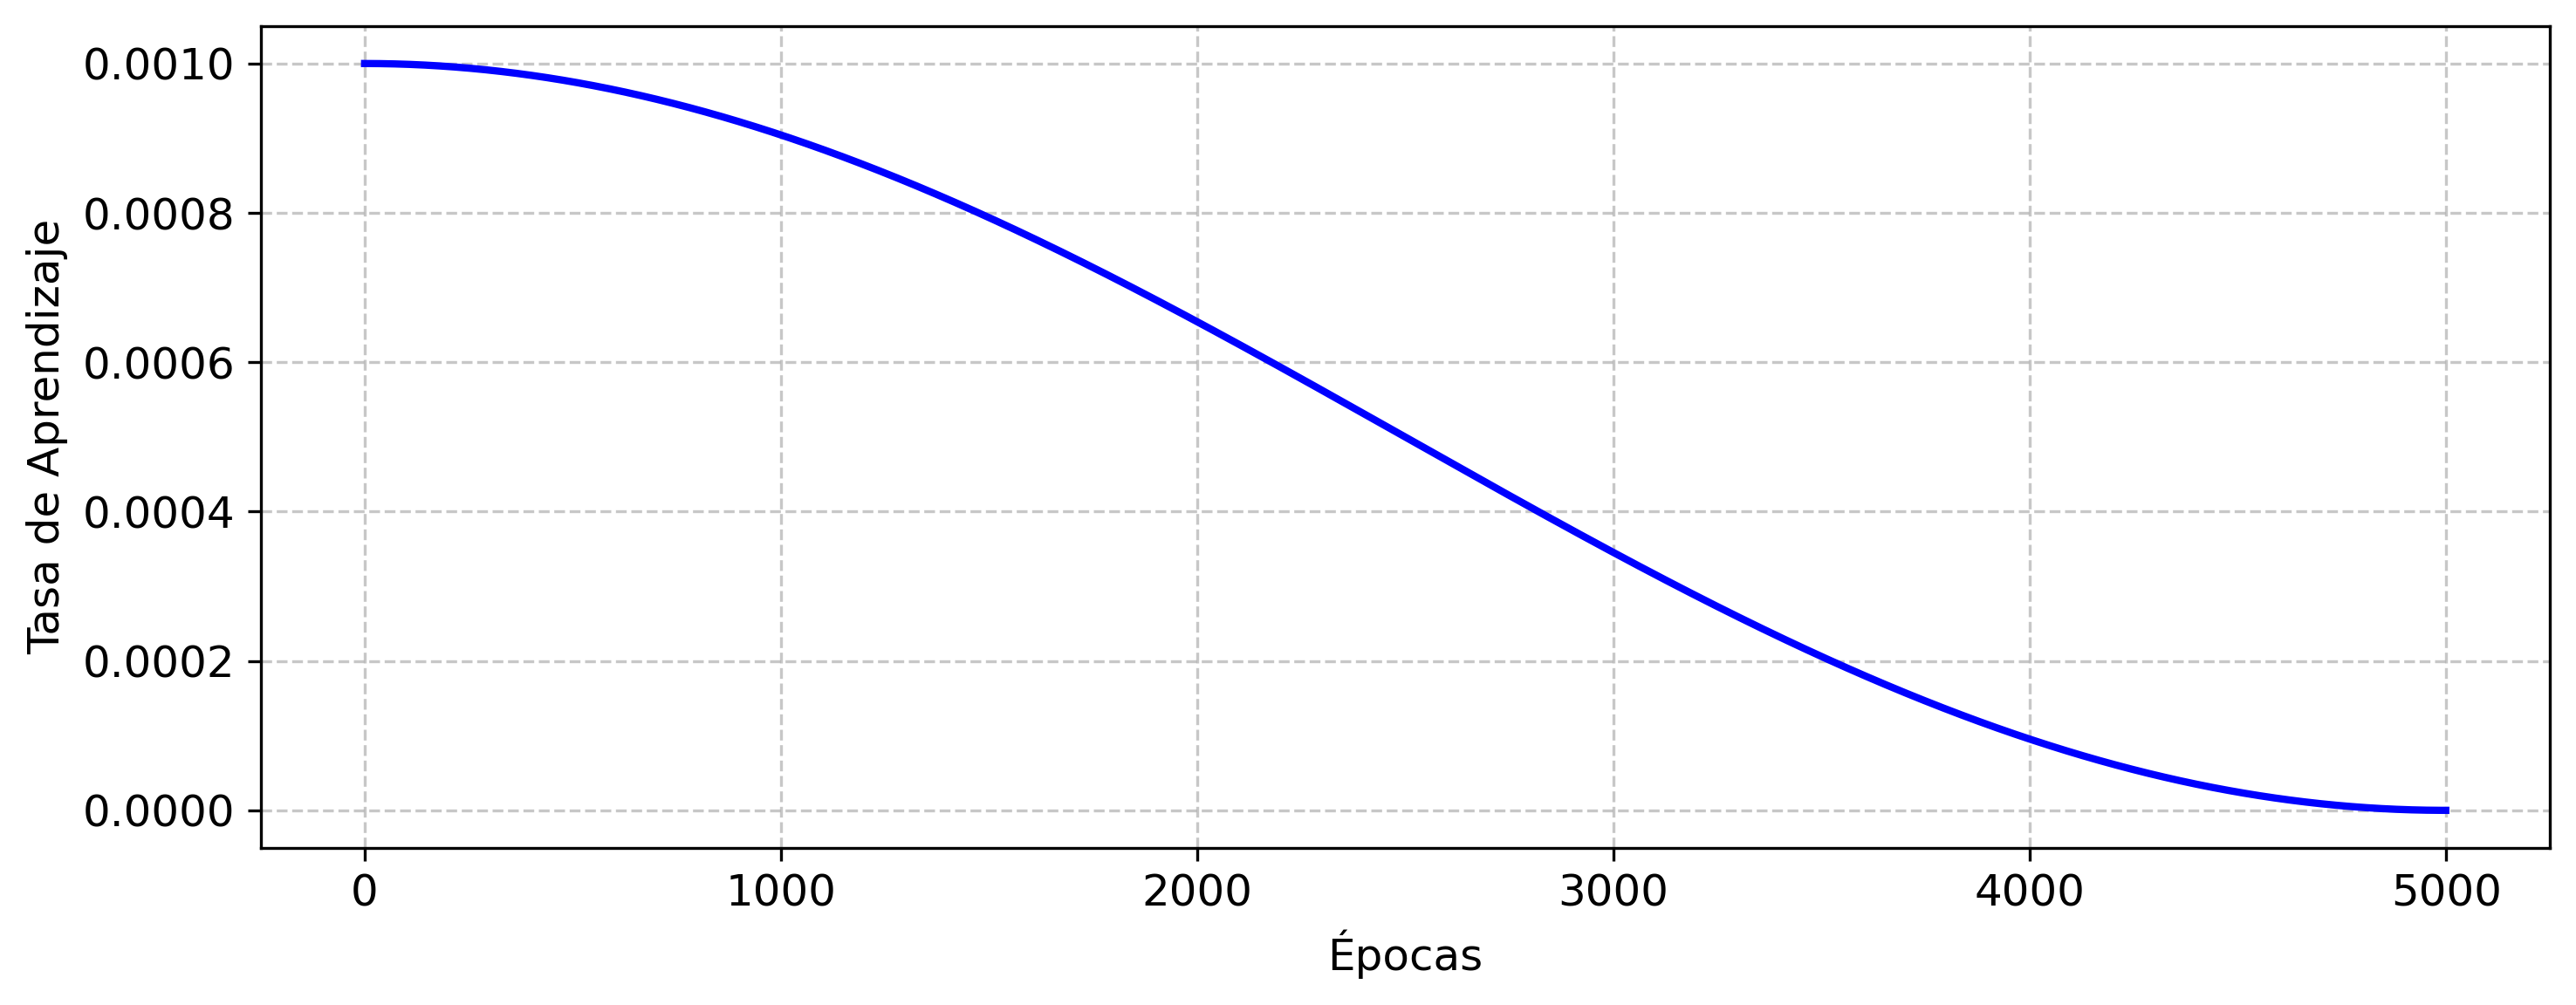

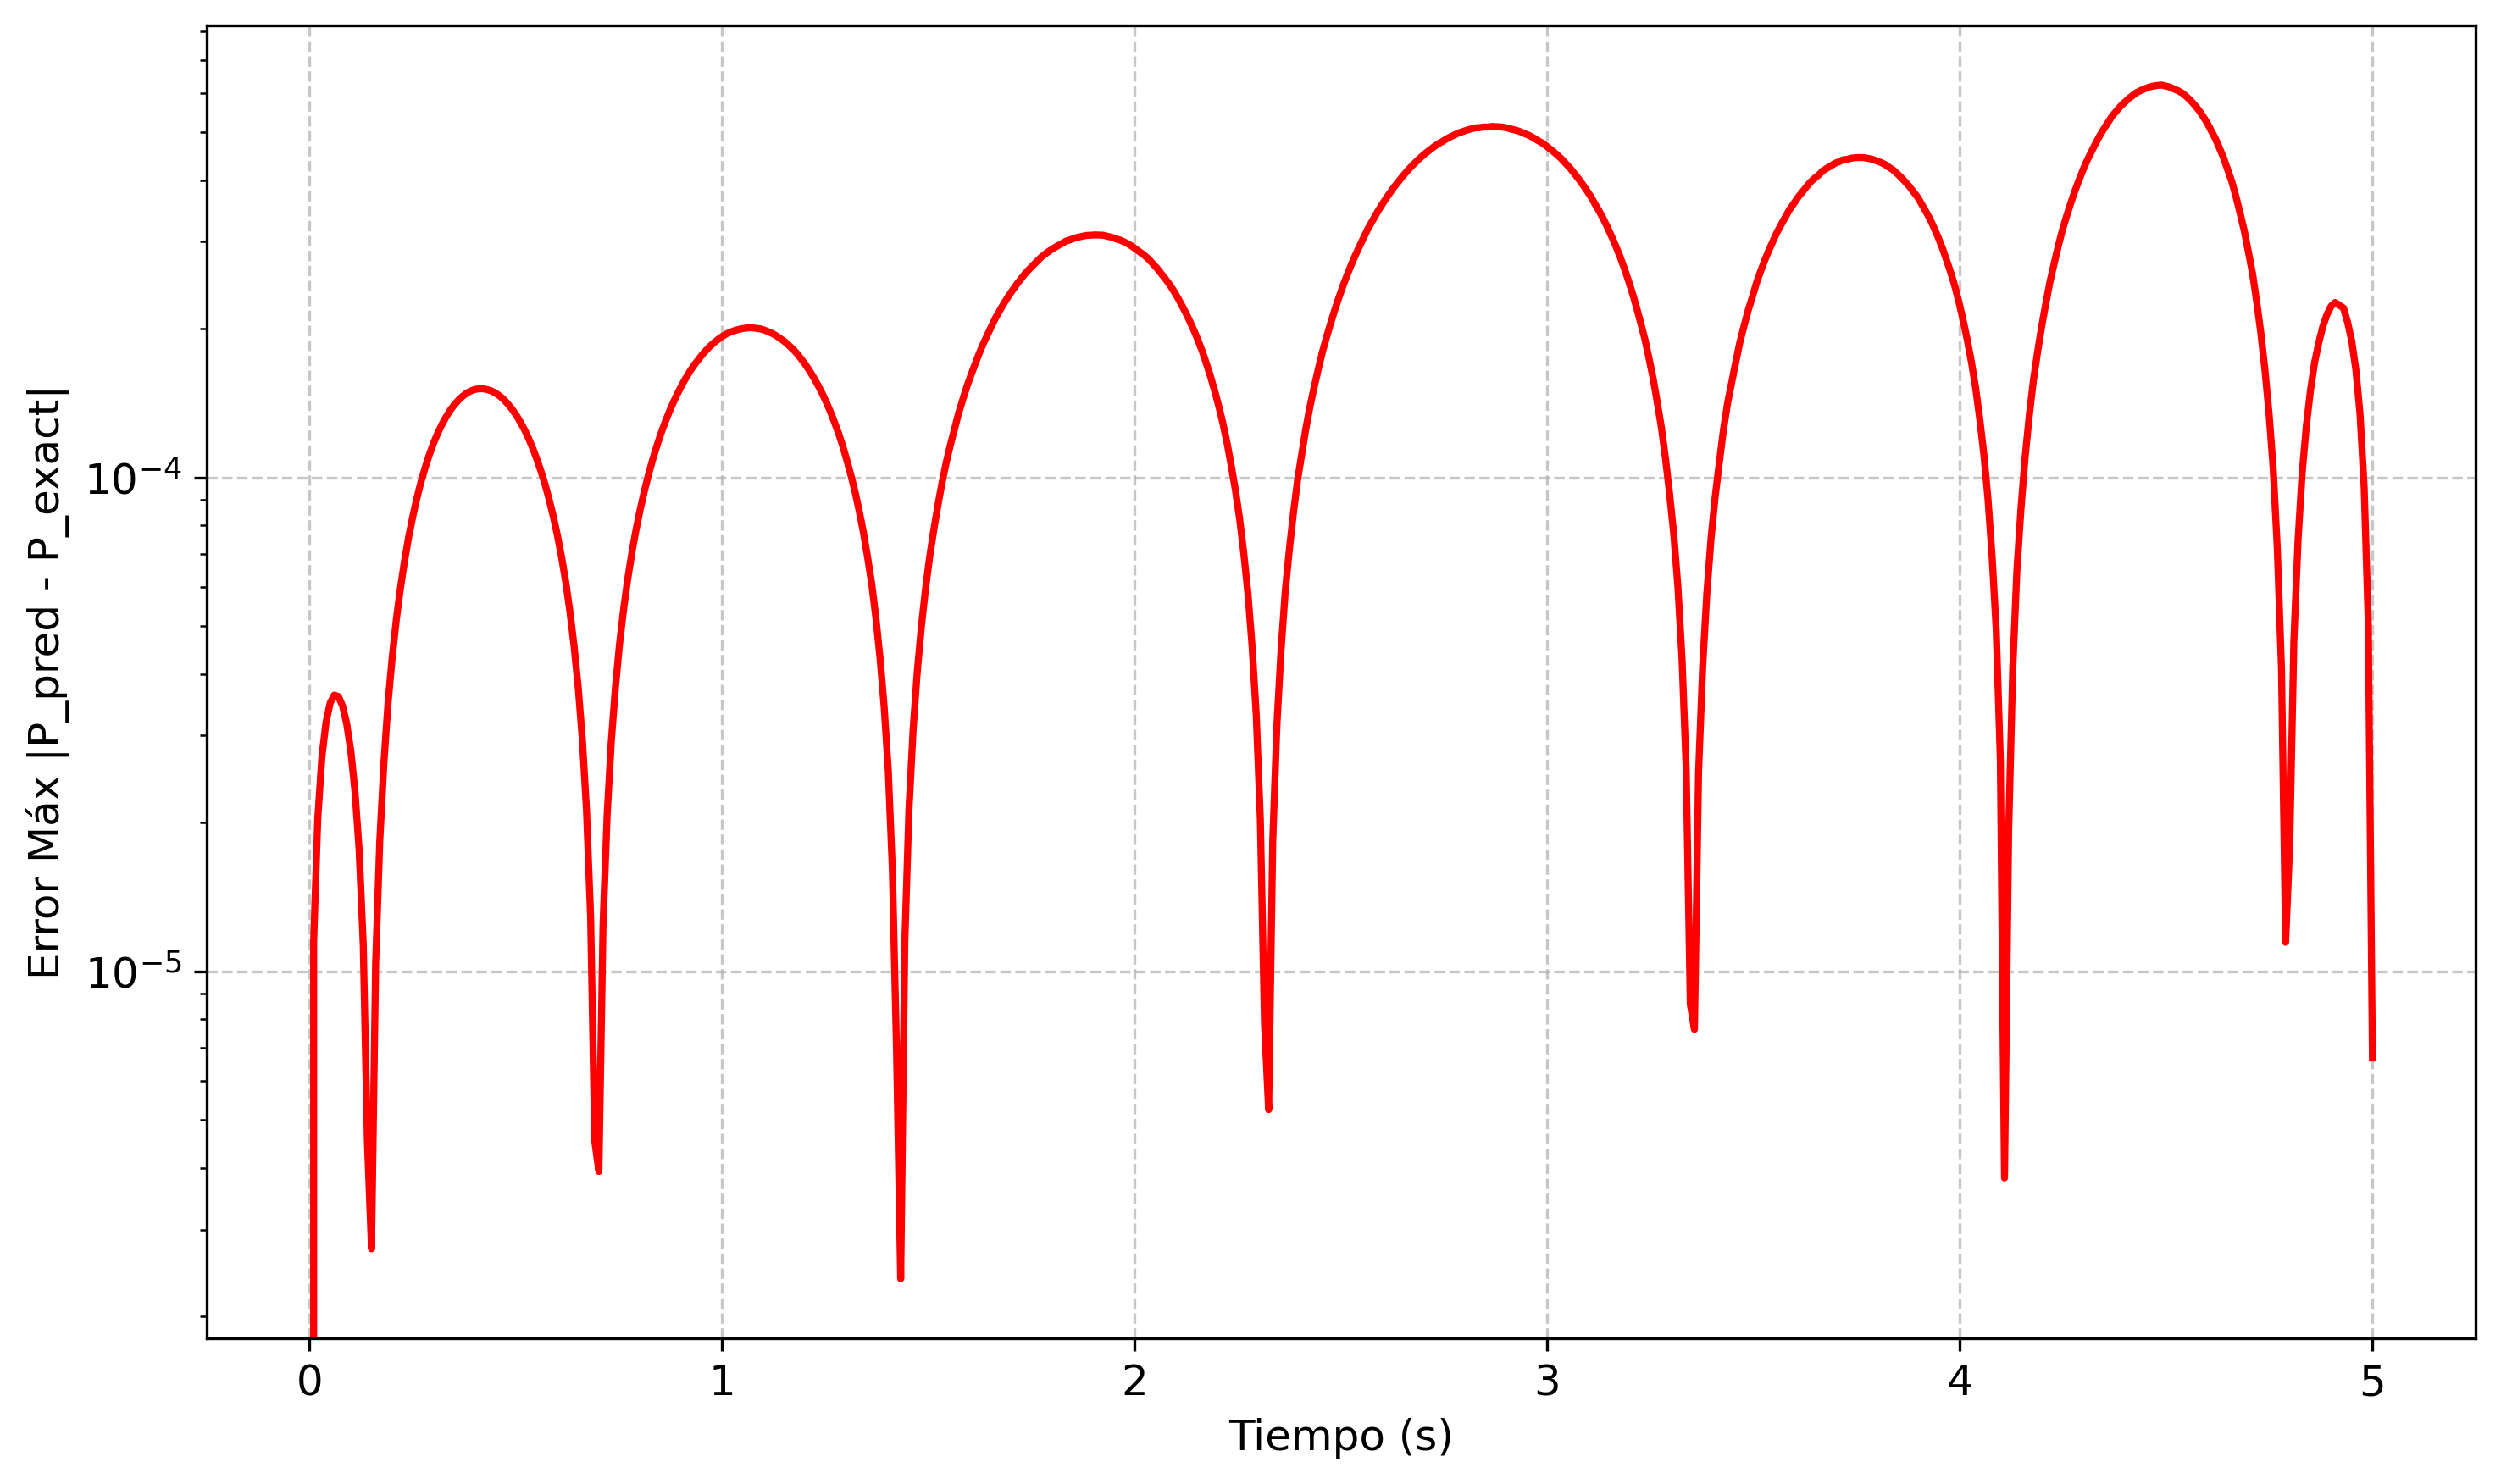

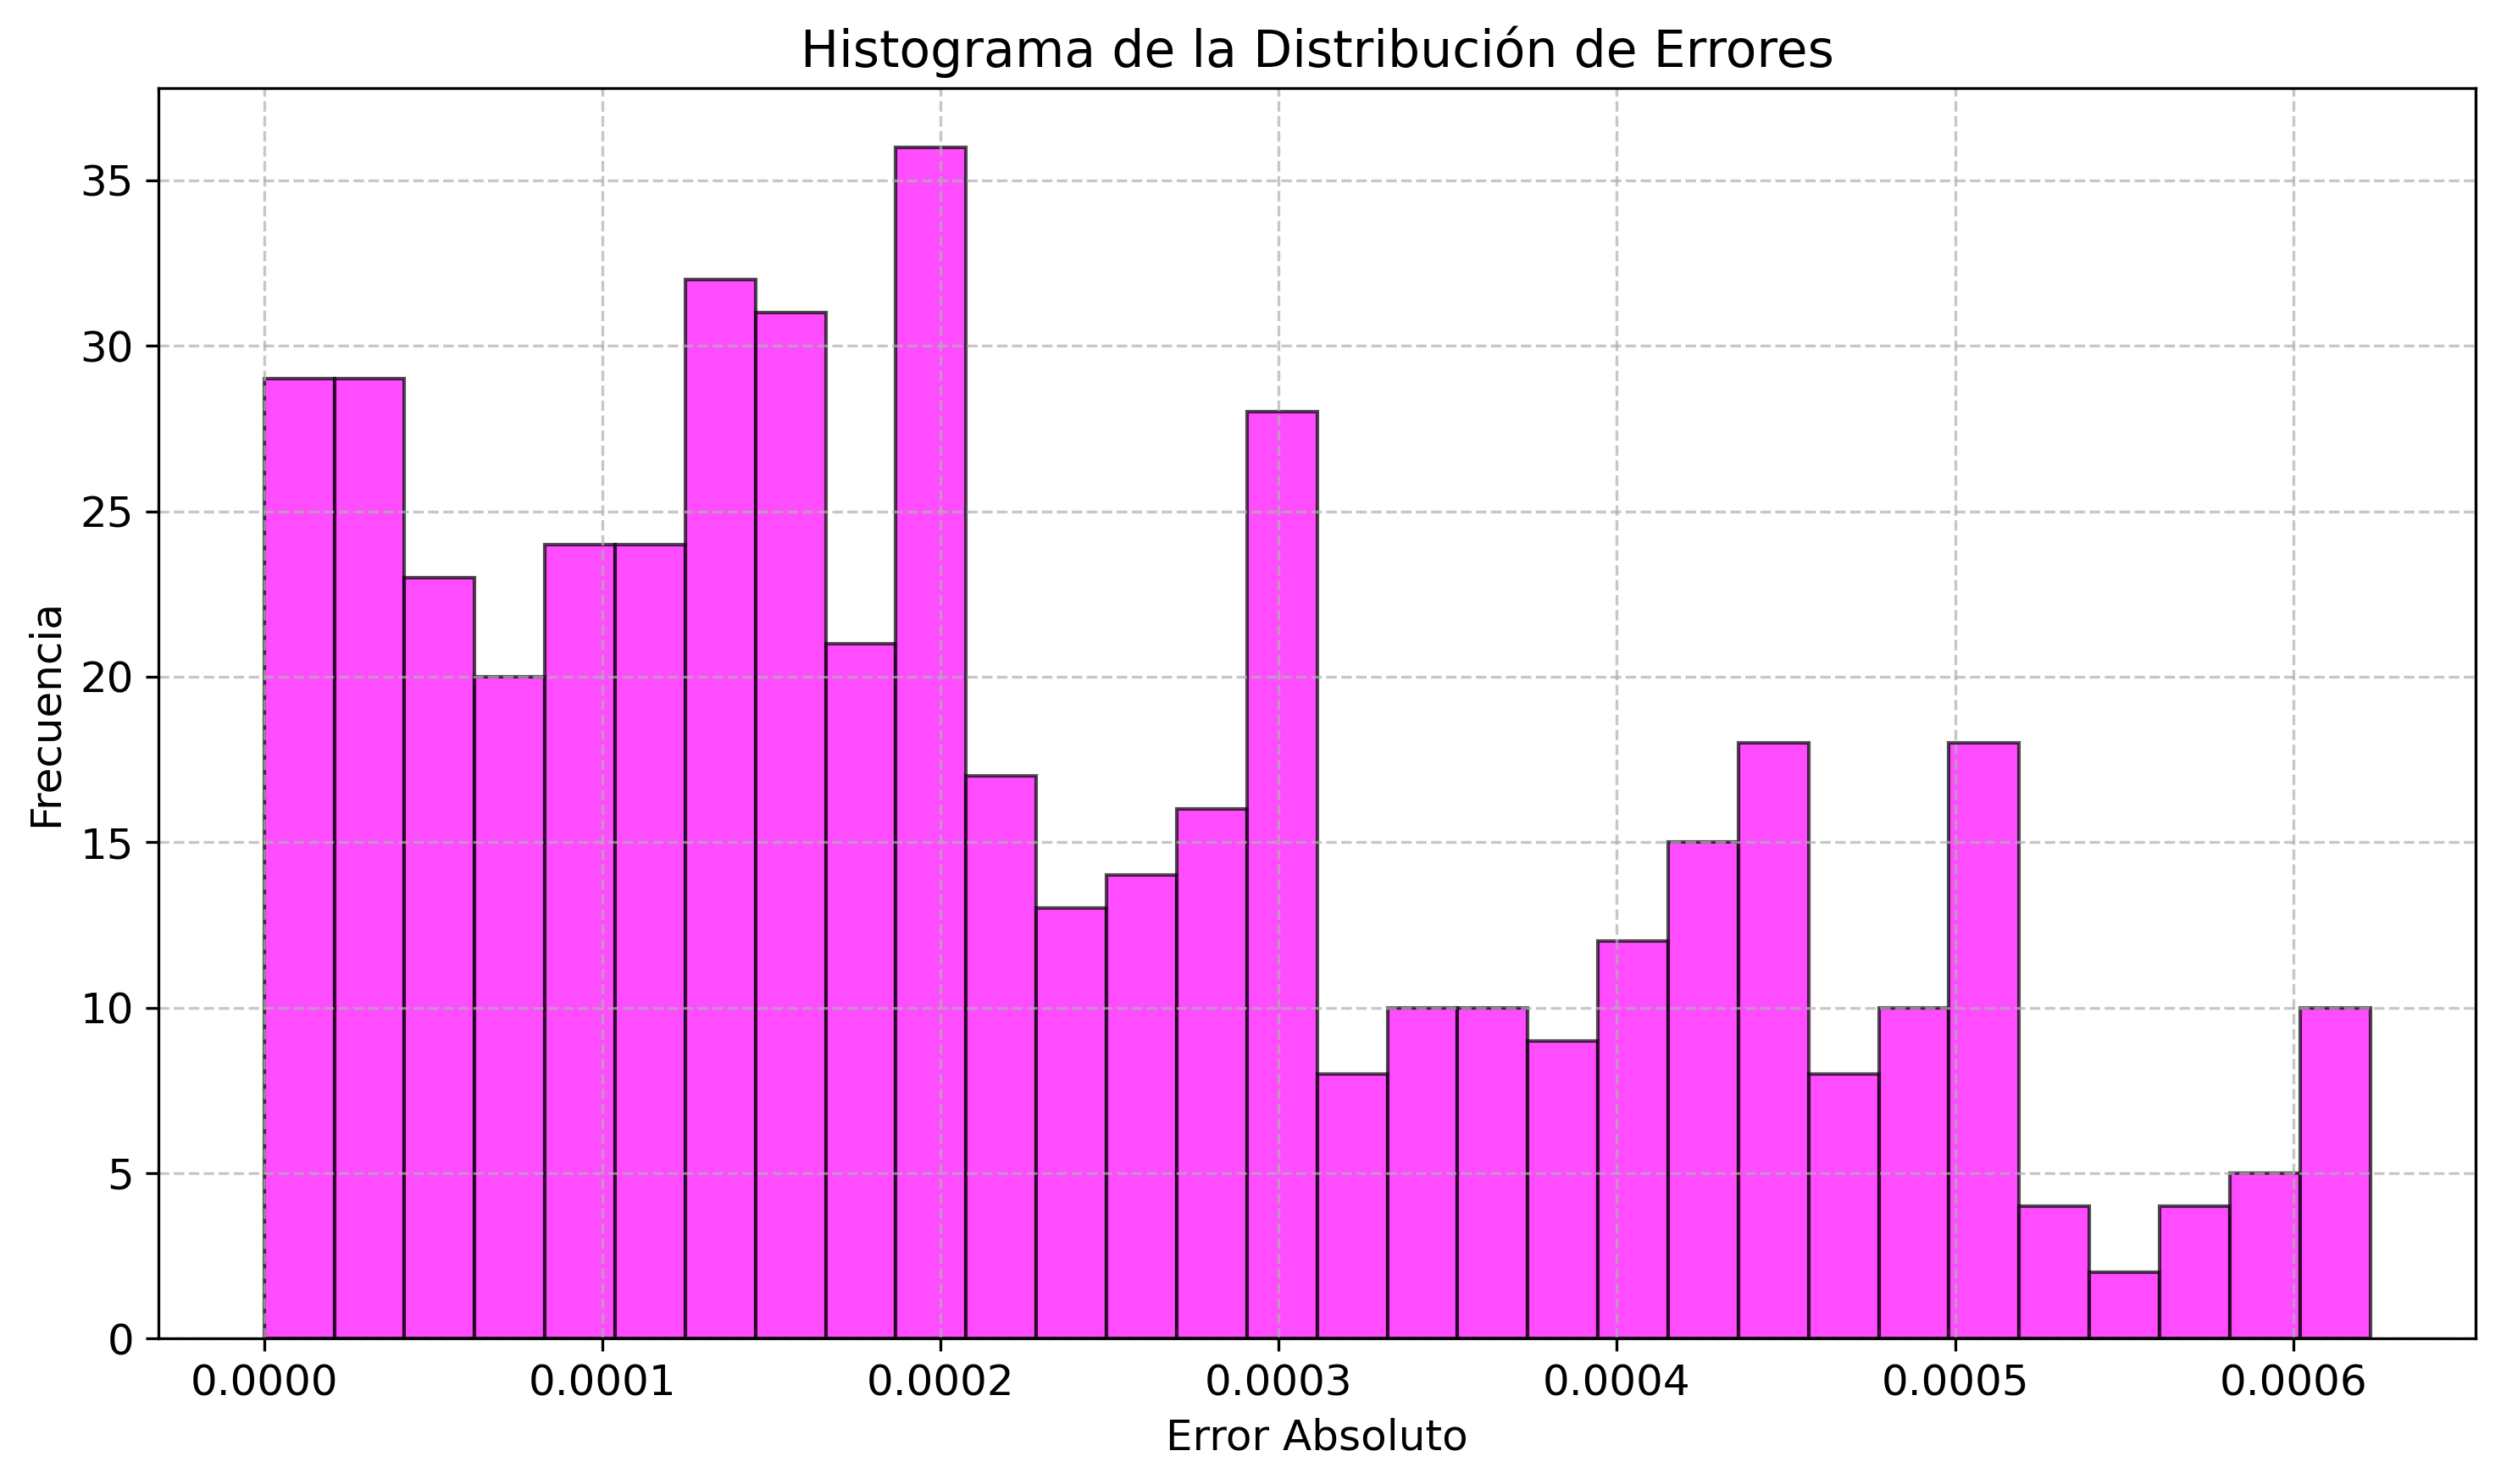

In [ ]:
"""
SOLUCIÓN DE ECUACIONES DIFERENCIALES CON REDES NEURONALES
Ejemplo: Ecuación de crecimiento poblacional (dP/dt = rP)

Este código implementa una red neuronal para aproximar soluciones de EDOs
utilizando el método de Physics-Informed Neural Networks (PINNs). Se evalúan
las métricas MAE, MSE y el error máximo absoluto, y se generan diversas gráficas,
incluido un histograma que muestra la distribución de los errores.
"""
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import os

# Crear directorio para guardar resultados si no existe
output_dir = "resultados_pinn"
os.makedirs(output_dir, exist_ok=True)

# =====================================================
# CONFIGURACIÓN DEL PROBLEMA (MODIFICAR PARA NUEVAS ECUACIONES)
# =====================================================
# Parámetros físicos
r = 0.5         # Tasa de crecimiento (1/s)
P0 = 1.0        # Población inicial (individuos)
t_max = 5.0     # Tiempo máximo de simulación (s)

# Parámetros de entrenamiento
n_points = 100     # Puntos de colocación
epochs = 5000      # Número de épocas
hidden_layers = [32, 32]  # Capas ocultas de la red
activation = nn.Tanh  # Función de activación (puede ser nn.Tanh o nn.GELU)

# Parámetros de optimización
learning_rate = 1e-3
print_freq = 500    # Frecuencia para imprimir resultados durante el entrenamiento

# =====================================================
# SOLUCIÓN ANALÍTICA (MODIFICAR PARA NUEVAS ECUACIONES)
# =====================================================
def analytic_solution(t):
    """
    Calcula la solución exacta de la EDO: dP/dt = rP
    La solución analítica es: P(t) = P0 * exp(r*t)

    Args:
        t (torch.Tensor): Tensor de tiempos.

    Returns:
        torch.Tensor: Solución exacta.
    """
    return P0 * torch.exp(r * t)

# =====================================================
# ARQUITECTURA DE LA RED NEURONAL (MODULAR)
# =====================================================
class PINN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, activation):
        """
        Define la red neuronal para aproximar la solución de la EDO.

        Args:
            input_dim (int): Dimensión de entrada (por ejemplo, 1 para el tiempo).
            output_dim (int): Dimensión de salida (por ejemplo, 1 para la solución escalar).
            hidden_layers (list): Lista que define el número de neuronas en cada capa oculta.
            activation (nn.Module): Función de activación (ej. nn.Tanh).
        """
        super().__init__()
        layers = []
        in_features = input_dim

        # Construcción de las capas ocultas
        for layer in hidden_layers:
            layers.append(nn.Linear(in_features, layer))
            layers.append(activation())
            in_features = layer

        # Capa de salida
        layers.append(nn.Linear(in_features, output_dim))
        self.network = nn.Sequential(*layers)

        # Inicialización de pesos para mejorar la convergencia
        self._initialize_weights()

    def _initialize_weights(self):
        """
        Inicializa los pesos de las capas lineales utilizando la inicialización de Xavier,
        y establece los sesgos a cero.
        """
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_normal_(module.weight)
                nn.init.zeros_(module.bias)

    def forward(self, t):
        """
        Propagación hacia adelante de la red.

        Args:
            t (torch.Tensor): Tensor de tiempos.

        Returns:
            torch.Tensor: Salida de la red.
        """
        return self.network(t)

# =====================================================
# FUNCIÓN DE PÉRDIDA (ADAPTAR PARA NUEVAS ECUACIONES)
# =====================================================
def compute_loss(model, t):
    """
    Calcula la pérdida basada en el residuo de la EDO:
      dP/dt - rP = 0.
    Se usa el error cuadrático medio del residuo.

    Args:
        model (PINN): Red neuronal.
        t (torch.Tensor): Puntos de tiempo de entrenamiento.

    Returns:
        torch.Tensor: Valor de la pérdida.
    """
    # Calcula la solución de prueba que garantiza la condición inicial P(0)=P0
    P_pred = trial_solution(t, model)

    # Calcula la derivada dP/dt usando autograd
    dP_dt = torch.autograd.grad(P_pred.sum(), t, create_graph=True, retain_graph=True)[0]

    # Define el residuo de la EDO
    residual = dP_dt - r * P_pred

    # Retorna el error cuadrático medio del residuo
    return torch.mean(residual**2)

# =====================================================
# SOLUCIÓN DE PRUEBA (MÉTODO DE LAGARIS)
# =====================================================
def trial_solution(t, model):
    """
    Define la solución de prueba que cumple la condición inicial P(0)=P0.

    Args:
        t (torch.Tensor): Tensor de tiempos.
        model (PINN): Red neuronal.

    Returns:
        torch.Tensor: Solución de prueba.
    """
    return P0 + t * model(t)

# =====================================================
# FUNCIONES DE EVALUACIÓN DEL MODELO
# =====================================================
def evaluate_model(model, t_eval):
    """
    Evalúa el modelo y calcula tres métricas de error:
      - MAE: Error medio absoluto.
      - MSE: Error cuadrático medio.
      - Error Máximo Absoluto: Error máximo absoluto (en el peor caso).

    Args:
        model (PINN): Modelo entrenado.
        t_eval (torch.Tensor): Puntos de evaluación.

    Returns:
        tuple: (P_pred, P_exact, mae, mse, max_abs_error)
    """
    with torch.no_grad():
        # Calcula la solución exacta y la solución predicha
        P_exact = analytic_solution(t_eval)
        P_pred = trial_solution(t_eval, model)

        # Calcula el MAE (mean absolute error)
        mae = torch.mean(torch.abs(P_pred - P_exact)).item()
        # Calcula el MSE (mean squared error)
        mse = torch.mean((P_pred - P_exact)**2).item()
        # Calcula el error máximo absoluto (el peor error en el dominio evaluado)
        max_abs_error = torch.max(torch.abs(P_pred - P_exact)).item()

        return P_pred, P_exact, mae, mse, max_abs_error

# =====================================================
# CONFIGURACIÓN DEL ENTRENAMIENTO
# =====================================================
# Establece la semilla para la reproducibilidad de resultados
torch.manual_seed(42)
np.random.seed(42)

# Define los puntos de entrenamiento (colocación) en el intervalo [0, t_max]
t_collocation = torch.linspace(0, t_max, n_points).reshape(-1, 1)
t_collocation.requires_grad_(True)  # Necesario para calcular derivadas

# Inicializa el modelo PINN
model = PINN(
    input_dim=1,
    output_dim=1,
    hidden_layers=hidden_layers,
    activation=activation
)

# Define el optimizador (Adam) y un scheduler para ajustar la tasa de aprendizaje
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Listas para almacenar las métricas durante el entrenamiento
start_time = time.time()
loss_history = []
mae_history = []
mse_history = []
max_abs_error_history = []  # Lista para almacenar el error máximo absoluto
lr_history = []

# =====================================================
# ENTRENAMIENTO
# =====================================================
print("\n===== INICIANDO ENTRENAMIENTO =====")
print(f"Ecuación: dP/dt = {r}P")
print(f"Condición inicial: P(0) = {P0}")
print(f"Arquitectura: {hidden_layers} con activación {activation.__name__}")
print(f"Épocas: {epochs}")
print(f"Puntos de colocación: {n_points}")
print("===================================\n")

for epoch in tqdm(range(epochs), desc="Entrenamiento"):
    # Realiza el paso de optimización
    optimizer.zero_grad()
    loss = compute_loss(model, t_collocation)
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Guarda la tasa de aprendizaje actual
    lr_history.append(optimizer.param_groups[0]['lr'])

    # Evalúa el modelo en puntos de alta resolución para obtener las métricas
    with torch.no_grad():
        t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1)
        P_pred, P_exact, mae, mse, max_abs_error = evaluate_model(model, t_fine)

        # Guarda las métricas en cada época
        loss_history.append(loss.item())
        mae_history.append(mae)
        mse_history.append(mse)
        max_abs_error_history.append(max_abs_error)

    # Imprime información cada 'print_freq' épocas para monitorear el entrenamiento
    if (epoch + 1) % print_freq == 0 or epoch == 0:
        print(f"Época {epoch+1}/{epochs} - Pérdida: {loss.item():.6e}, MAE: {mae:.6e}, MSE: {mse:.6e}")
        print(f"LR: {optimizer.param_groups[0]['lr']:.6e}, Error Máx: {max_abs_error:.6e}")

# Tiempo total de entrenamiento
elapsed_time = time.time() - start_time

# =====================================================
# EVALUACIÓN Y RESULTADOS FINALES
# =====================================================
# Se evalúa el modelo final en una malla fina para obtener las soluciones y errores
t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1)
P_pred, P_exact, final_mae, final_mse, final_max_abs_error = evaluate_model(model, t_fine)

# Convertir tensores a arrays de NumPy para facilitar la graficación
t_np = t_fine.detach().numpy()
P_exact_np = P_exact.detach().numpy()
P_pred_np = P_pred.detach().numpy()

# Tabla de errores finales para análisis
error_table = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "Error Máx Absoluto"],
    "Valor Final": [final_mae, final_mse, final_max_abs_error],
    "Promedio (últimas 100 épocas)": [
        np.mean(mae_history[-100:]),
        np.mean(mse_history[-100:]),
        np.mean(max_abs_error_history[-100:])
    ]
})

# Criterios de aceptación (estos valores pueden ajustarse según la aplicación)
ACCEPTANCE_CRITERIA = {
    "MAE": 1e-3,
    "MSE": 1e-4,
    "Error Máx Absoluto": 1e-3
}

# Verifica si el modelo cumple con los criterios de aceptación
model_adequate = all([
    error_table["Promedio (últimas 100 épocas)"][i] < val
    for i, val in enumerate([
        ACCEPTANCE_CRITERIA["MAE"],
        ACCEPTANCE_CRITERIA["MSE"],
        ACCEPTANCE_CRITERIA["Error Máx Absoluto"]
    ])
])

# =====================================================
# TABLA DE CONVERGENCIA NUMÉRICA
# =====================================================
# Se crea una tabla con las métricas en ciertas épocas para analizar la convergencia
convergence_epochs = [0, 100, 500, 1000, 2000, epochs-1]
convergence_table = pd.DataFrame({
    "Época": [e+1 for e in convergence_epochs],
    "Pérdida": [loss_history[e] for e in convergence_epochs],
    "MAE": [mae_history[e] for e in convergence_epochs],
    "MSE": [mse_history[e] for e in convergence_epochs],
    "Error Máx": [max_abs_error_history[e] for e in convergence_epochs]
})

# =====================================================
# GRÁFICAS DE ALTA RESOLUCIÓN
# =====================================================
plt.rcParams.update({'font.size': 12})

# -----------------------------------------------------------------------------
# Gráfica 1: Solución Predicha vs. Solución Analítica
# Compara la solución exacta (analítica) con la solución aproximada por la PINN.
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, P_exact_np, label="Analítica", color="navy", lw=2)
plt.plot(t_np, P_pred_np, '--', label="PINN", color="orange", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Población P(t)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/solucion_poblacional.png", bbox_inches="tight")

# -----------------------------------------------------------------------------
# Gráfica 2: Comparación de MAE y MSE
# Muestra en un mismo gráfico la evolución del MAE (error medio absoluto) y el MSE (error cuadrático medio)
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(mae_history, label="MAE (Error Medio Absoluto)", color="orange", lw=2, marker='o', markersize=3)
plt.plot(mse_history, label="MSE (Error Cuadrático Medio)", color="green", lw=2, marker='s', markersize=3)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/mae_mse_comparacion.png", bbox_inches="tight")

# -----------------------------------------------------------------------------
# Gráfica 3: Convergencia de la Pérdida
# Muestra la evolución de la pérdida (MSE del residuo) a lo largo de las épocas.
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(loss_history, color="purple", lw=2)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/convergencia_perdida.png", bbox_inches="tight")

# -----------------------------------------------------------------------------
# Gráfica 4: Evolución de la Tasa de Aprendizaje
# Visualiza cómo cambia la tasa de aprendizaje durante el entrenamiento.
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(lr_history, color="blue", lw=2)
plt.xlabel("Épocas")
plt.ylabel("Tasa de Aprendizaje")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/tasa_aprendizaje.png", bbox_inches="tight")

# -----------------------------------------------------------------------------
# Gráfica 5: Distribución del Error Máx Absoluto a lo largo del tiempo
# Muestra la diferencia absoluta entre la solución predicha y la exacta en cada punto de tiempo.
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, np.abs(P_pred_np - P_exact_np), color="red", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("Error Máx |P_pred - P_exact|")
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/error_distribucion.png", bbox_inches="tight")

# -----------------------------------------------------------------------------
# Gráfica 6: Histograma de Errores
# Se genera un histograma de los errores absolutos entre la solución predicha y la exacta
# para analizar la distribución de dichos errores.
errors = np.abs(P_pred_np - P_exact_np)  # Errores absolutos en cada punto de tiempo
plt.figure(figsize=(10, 6), dpi=300)
plt.hist(errors, bins=30, color="magenta", alpha=0.7, edgecolor="black")
plt.xlabel("Error Absoluto")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Distribución de Errores")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/histograma_errores.png", bbox_inches="tight")

# =====================================================
# INFORME FINAL
# =====================================================
print("\n" + "="*50)
print("=== INFORME DE RESULTADOS ===")
print("="*50)
print(f"Tiempo de entrenamiento: {elapsed_time:.2f} segundos")
print(f"Modelo adecuado para la ecuación: {'✓ Sí' if model_adequate else '✗ No'}")

print("\nTabla de errores finales:")
print(error_table.to_string(index=False))

print("\nCriterios de aceptación:")
for i, (metric, value) in enumerate(ACCEPTANCE_CRITERIA.items()):
    avg_value = error_table["Promedio (últimas 100 épocas)"][i]
    print(f"- {metric}: {'✓' if avg_value < value else '✗'} Cumple (límite: {value:.2e}, obtenido: {avg_value:.2e})")

print("\nTabla de convergencia numérica:")
pd.set_option('display.float_format', '{:.6e}'.format)
print(convergence_table.to_string(index=False))
pd.reset_option('display.float_format')

print("\nLas gráficas se han guardado en el directorio:", output_dir)
print("="*50)

# =====================================================
# GUARDAR DATOS PARA ANÁLISIS POSTERIOR
# =====================================================
convergence_data = pd.DataFrame({
    "Época": range(1, len(loss_history) + 1),
    "Pérdida": loss_history,
    "MAE": mae_history,
    "MSE": mse_history,
    "Error_Máx": max_abs_error_history,
    "Tasa_Aprendizaje": lr_history
})
convergence_data.to_csv(f"{output_dir}/convergencia_datos.csv", index=False)



===== INICIANDO ENTRENAMIENTO =====


Entrenamiento: 100%|██████████| 5000/5000 [00:15<00:00, 314.45it/s]



Tiempo de entrenamiento: 15.91 segundos.
Error final MAE: 3.9278e-05
Error final MSE: 2.0485e-09
Error máximo absoluto: 8.5115e-05

Tabla de resultados finales:
              Métrica   Valor Final  Promedio (últimas 100 épocas)
0                 MAE  3.927797e-05                   3.927986e-05
1                 MSE  2.048495e-09                   2.048647e-09
2  Error Máx Absoluto  8.511543e-05                   8.511543e-05


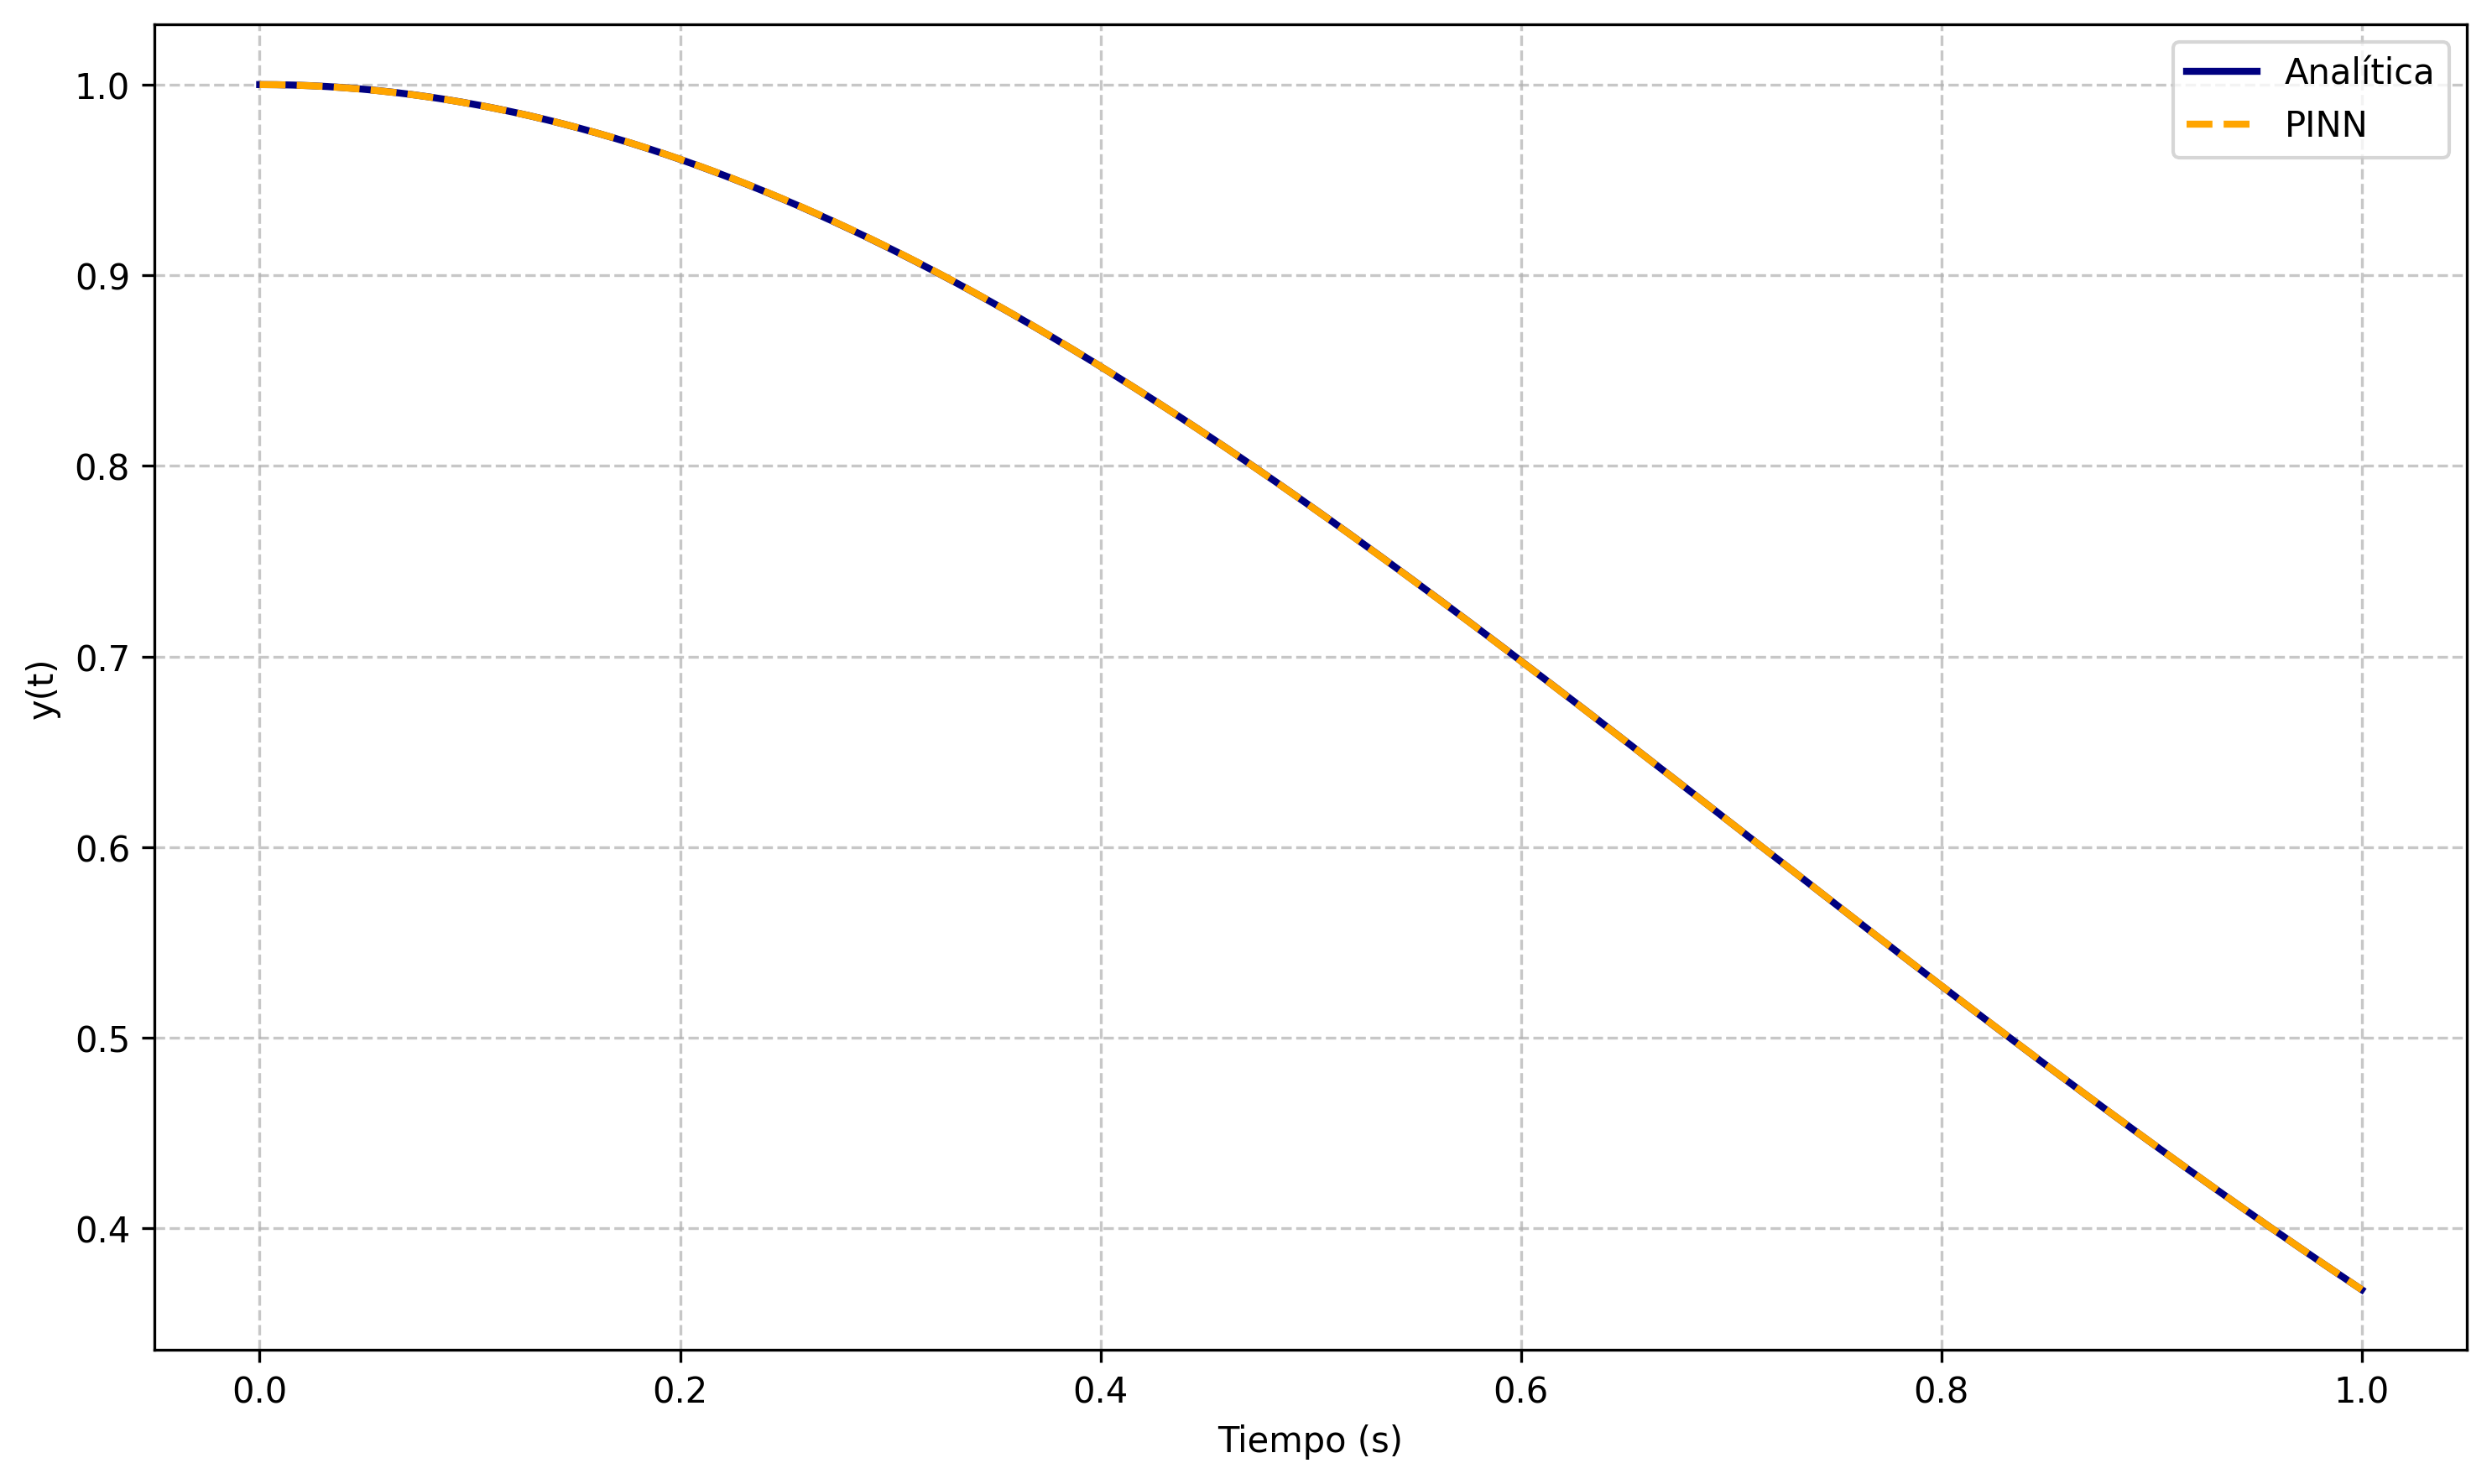

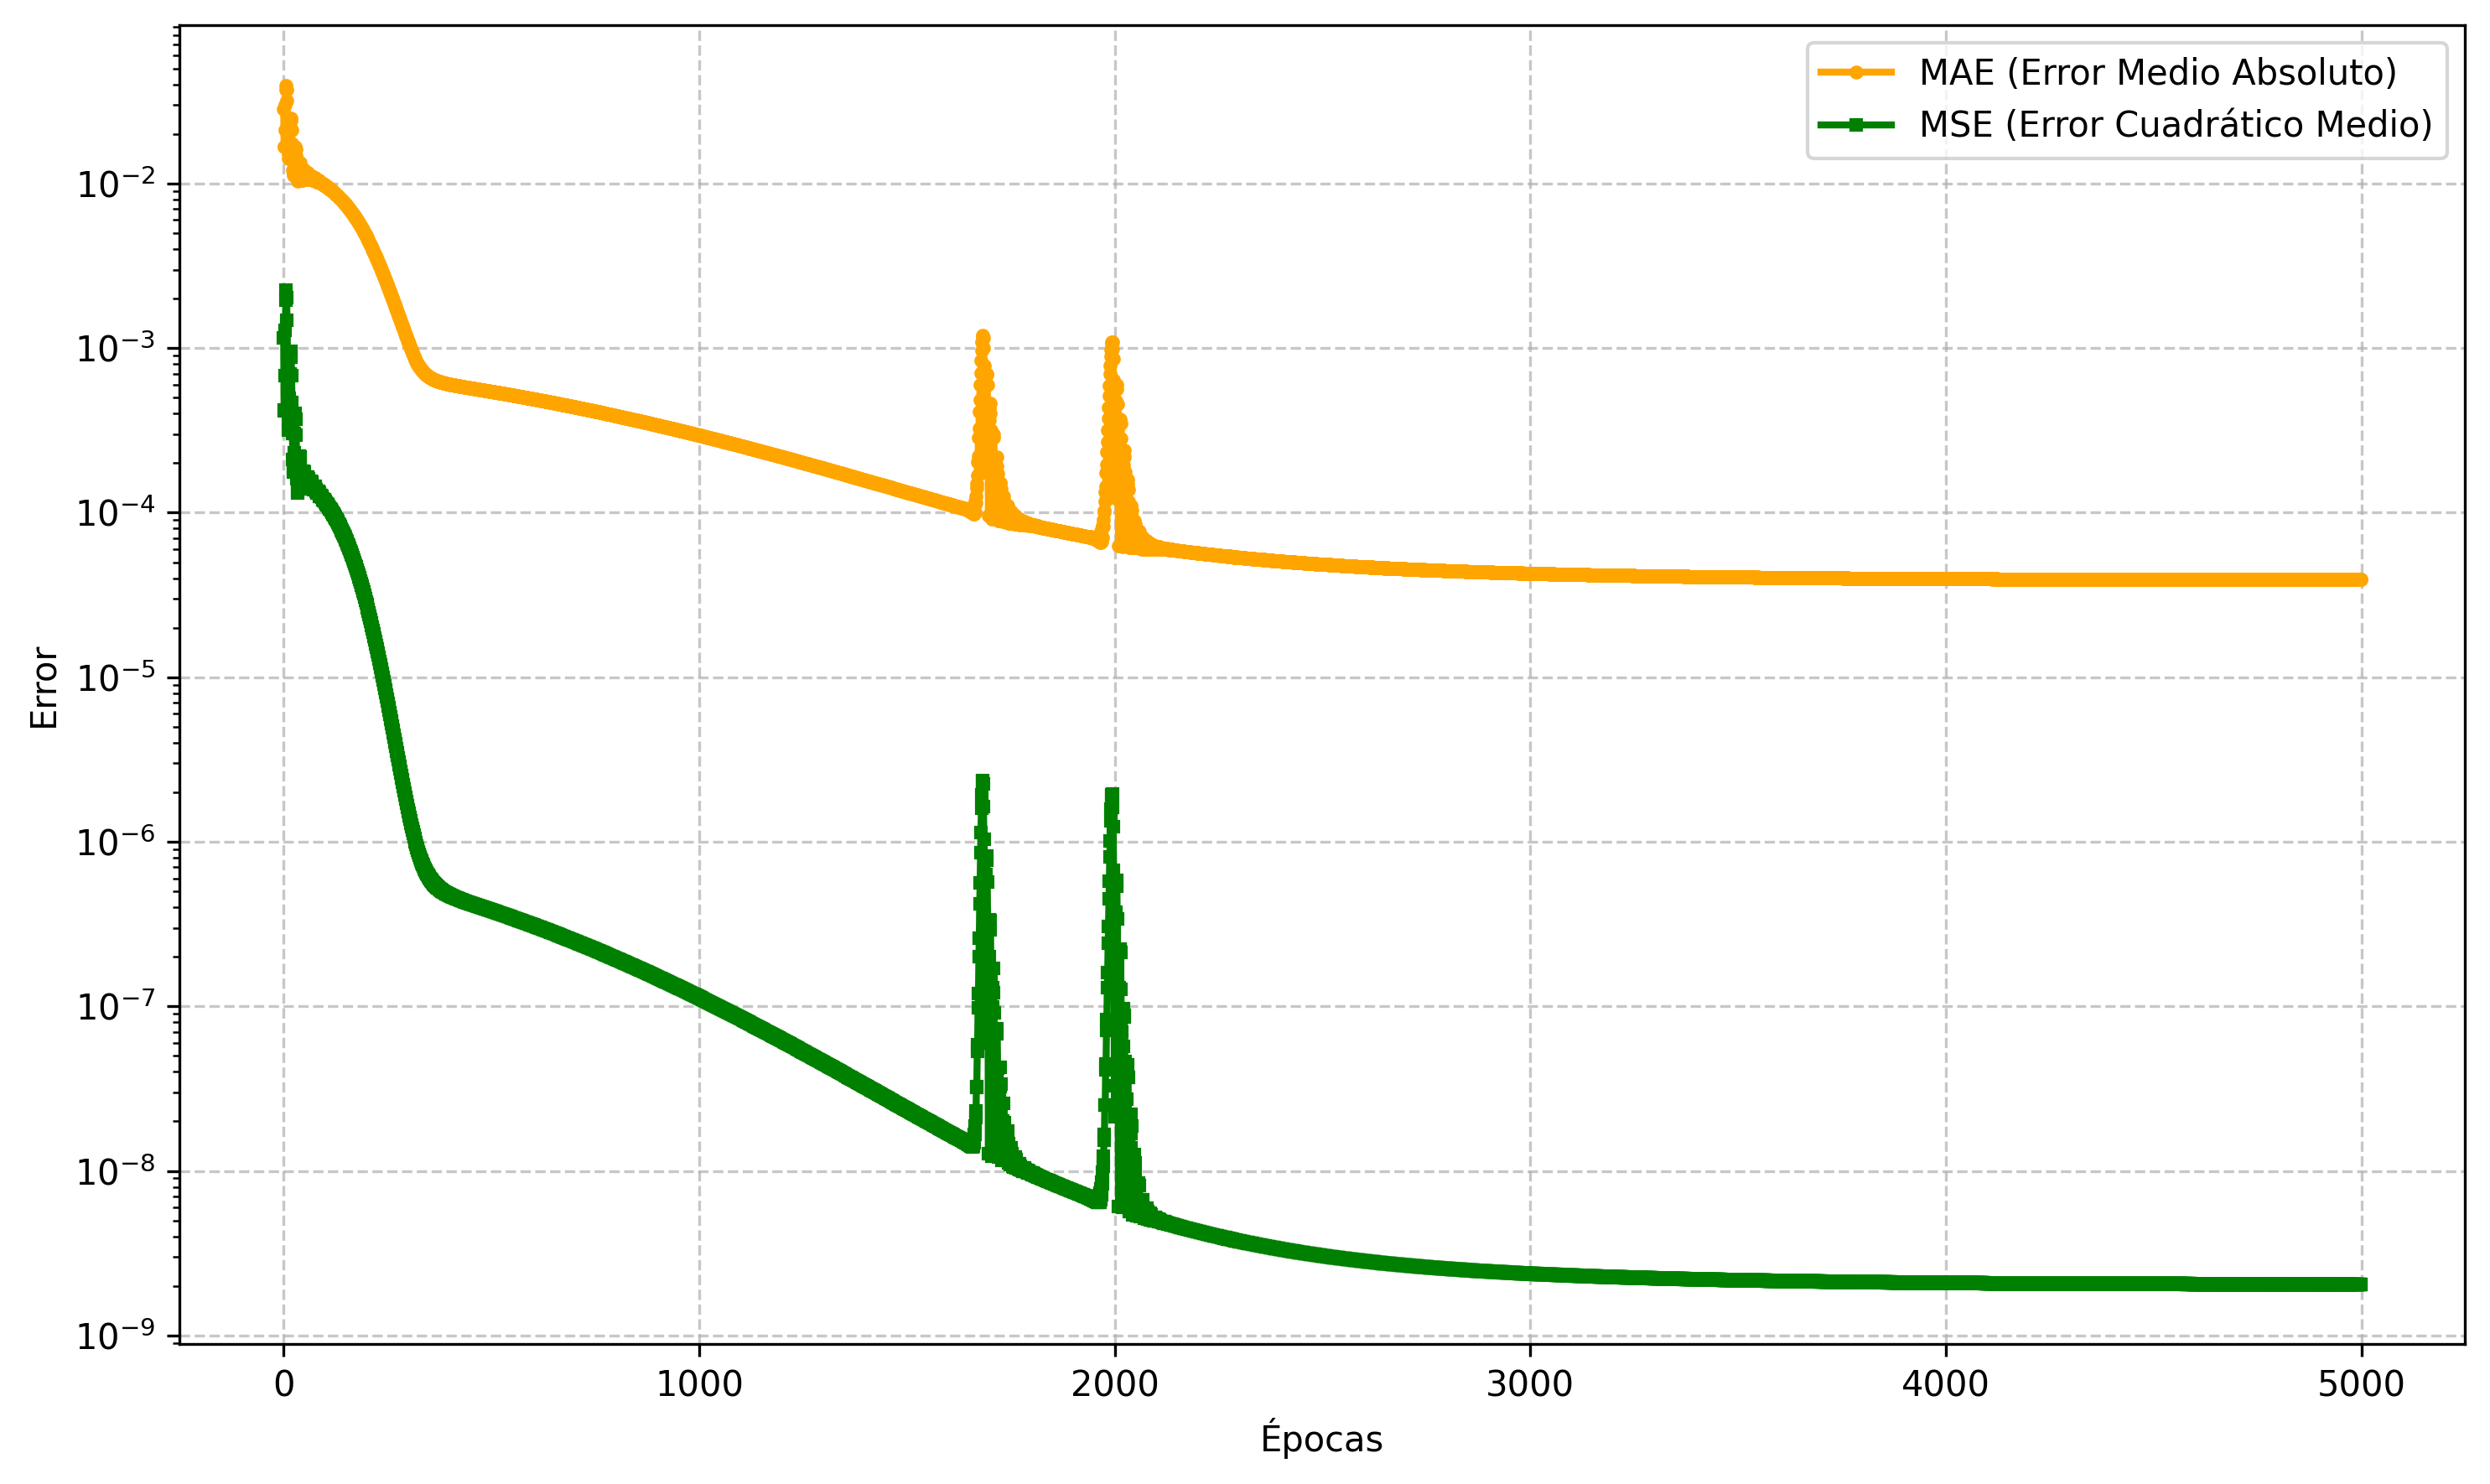

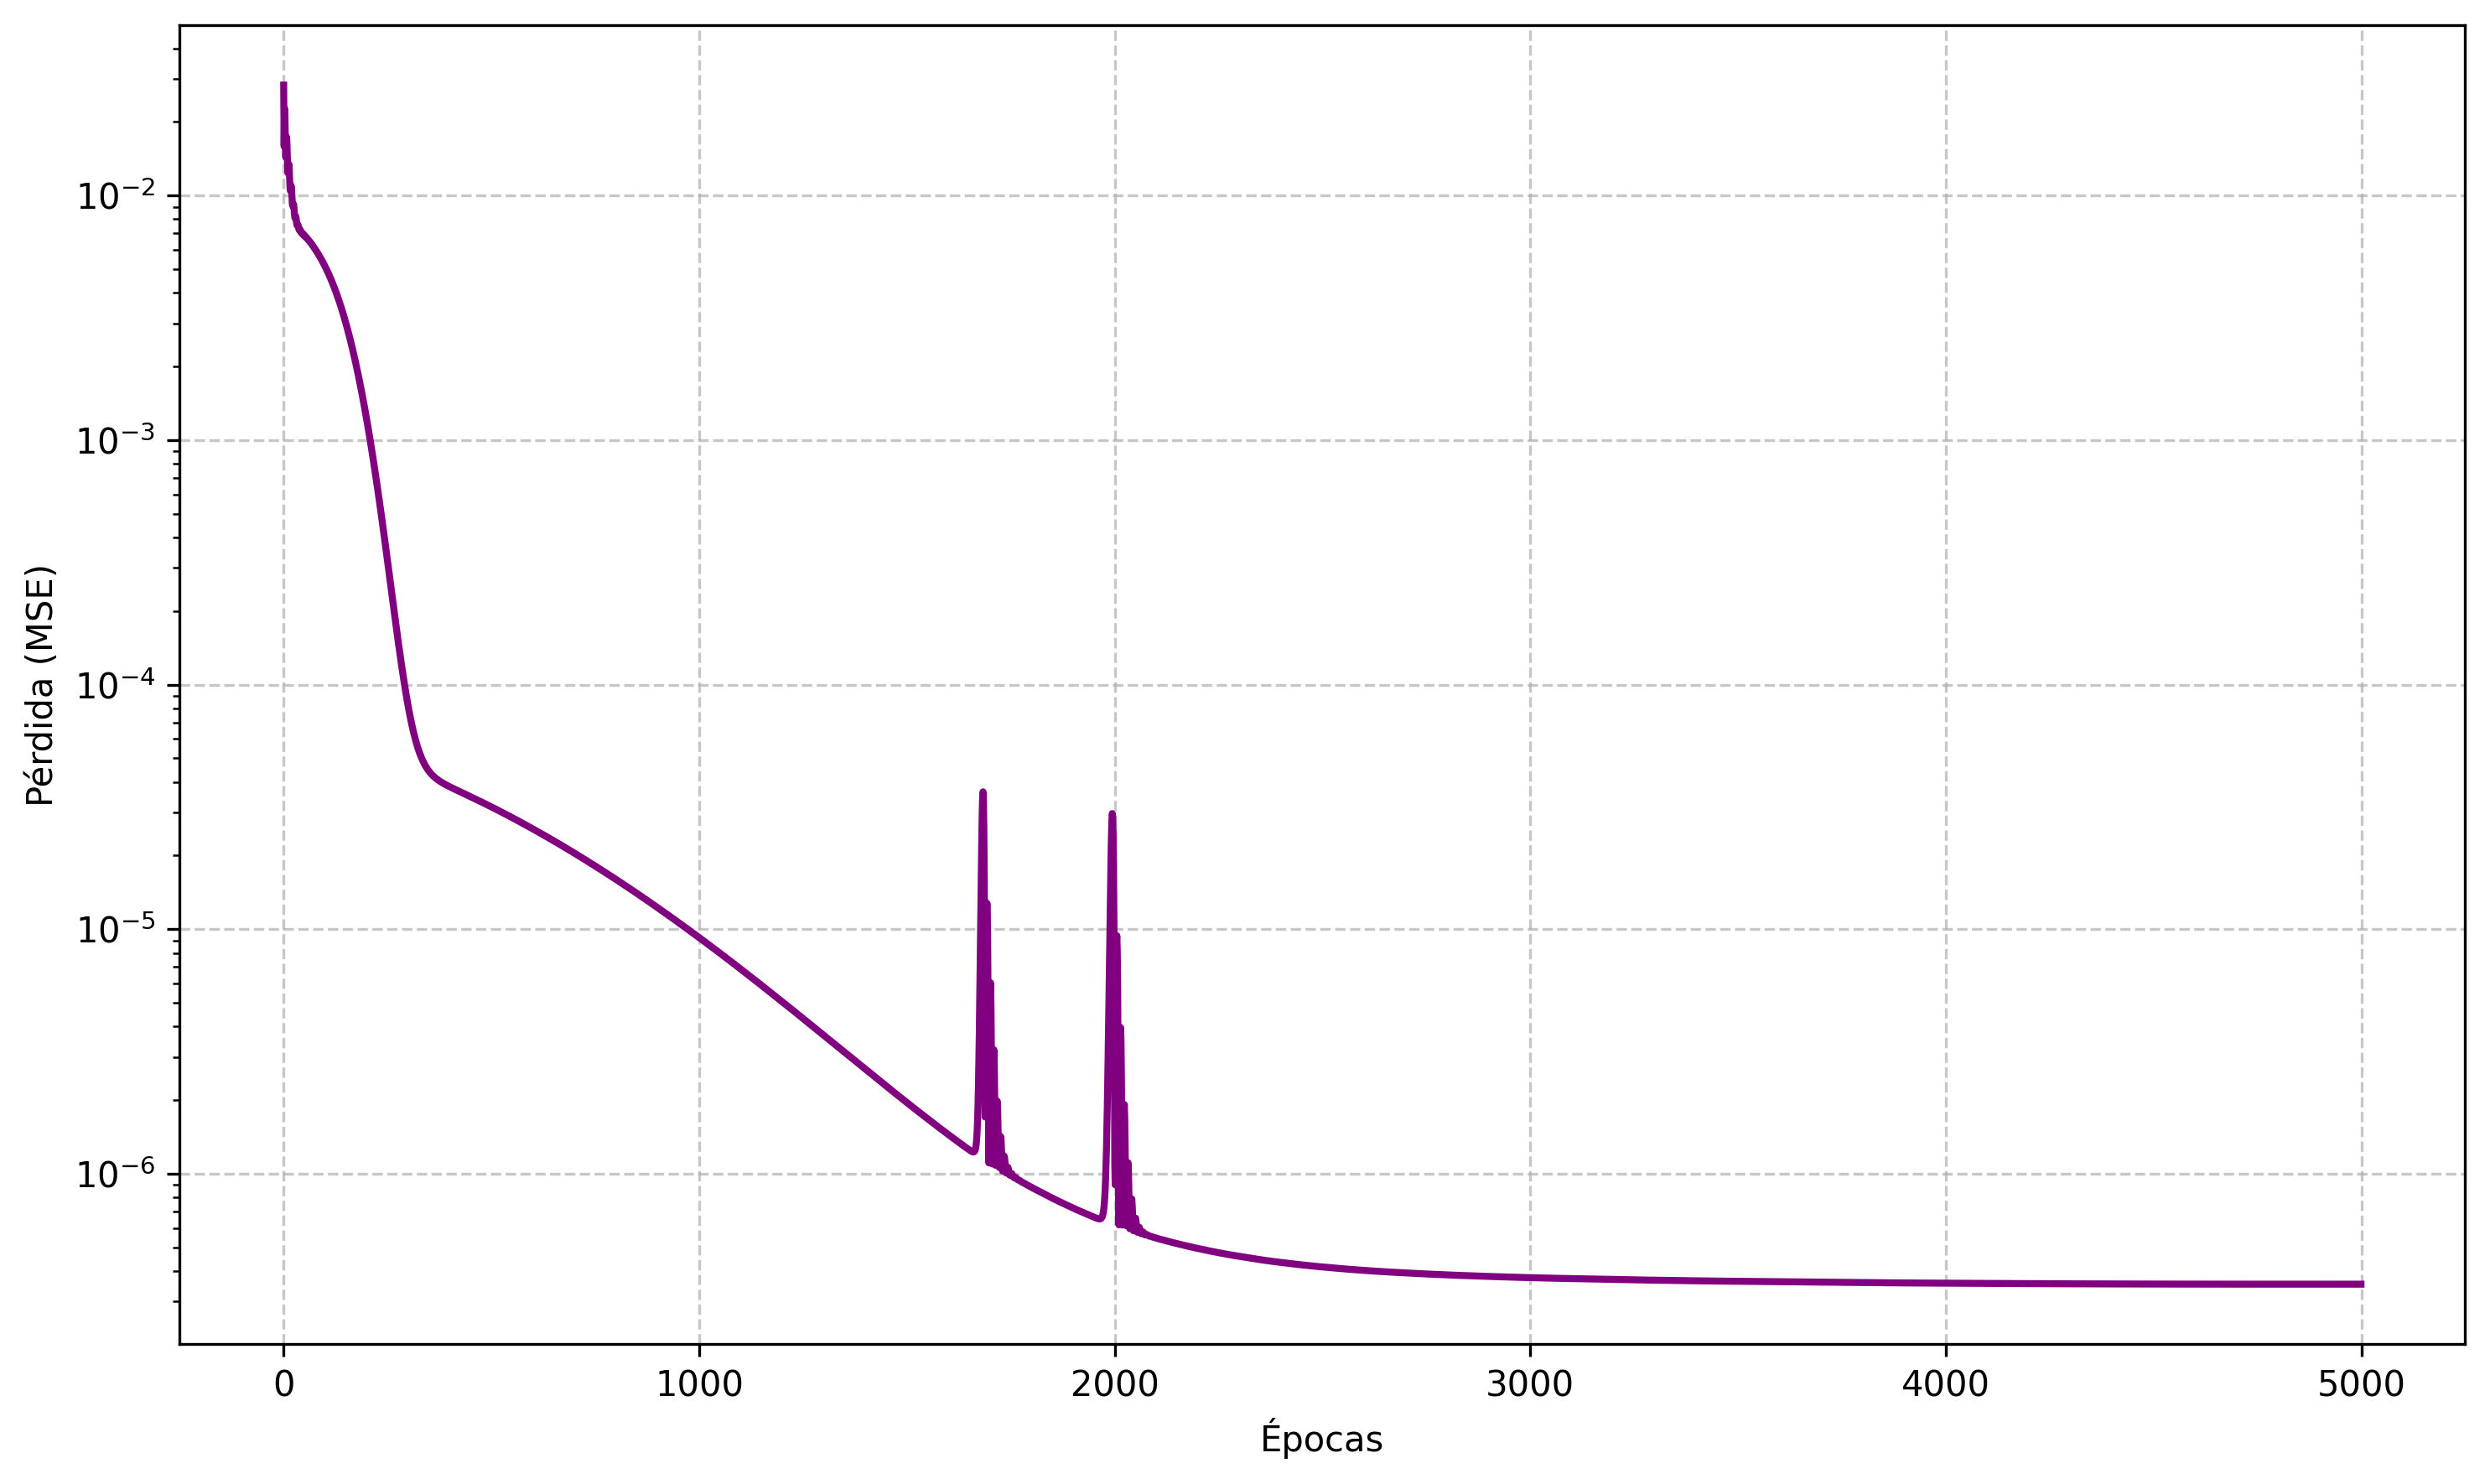

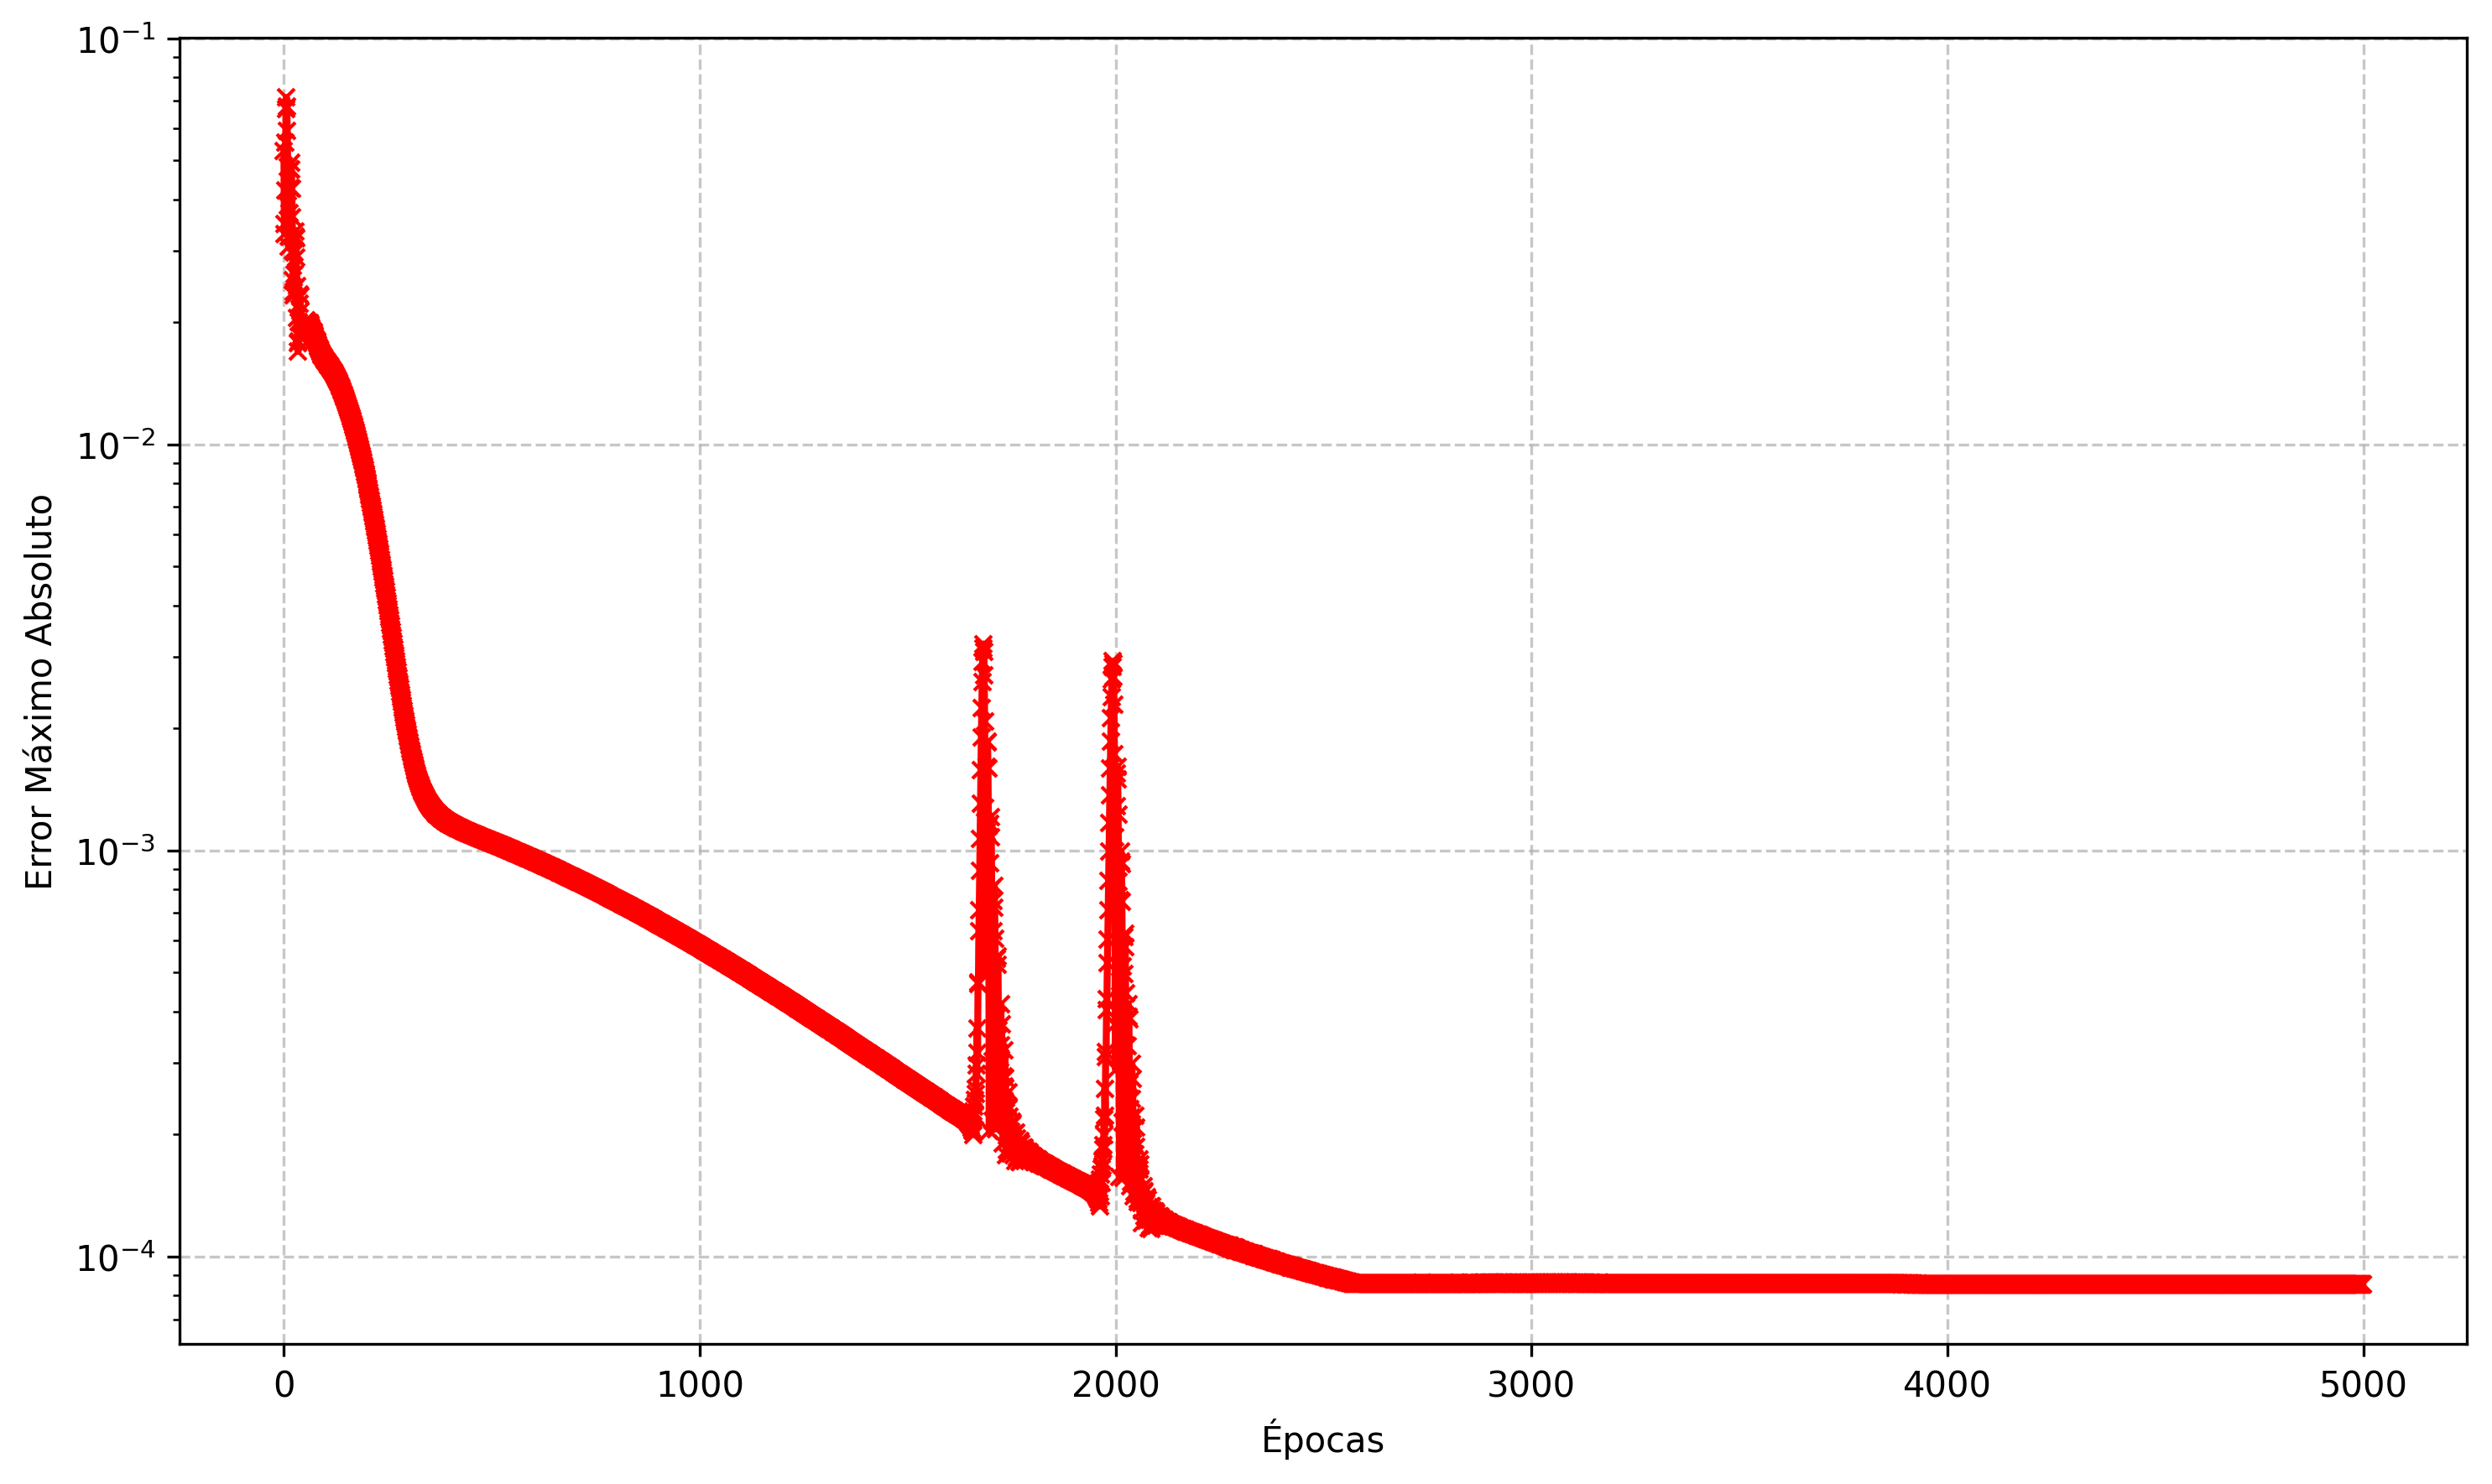

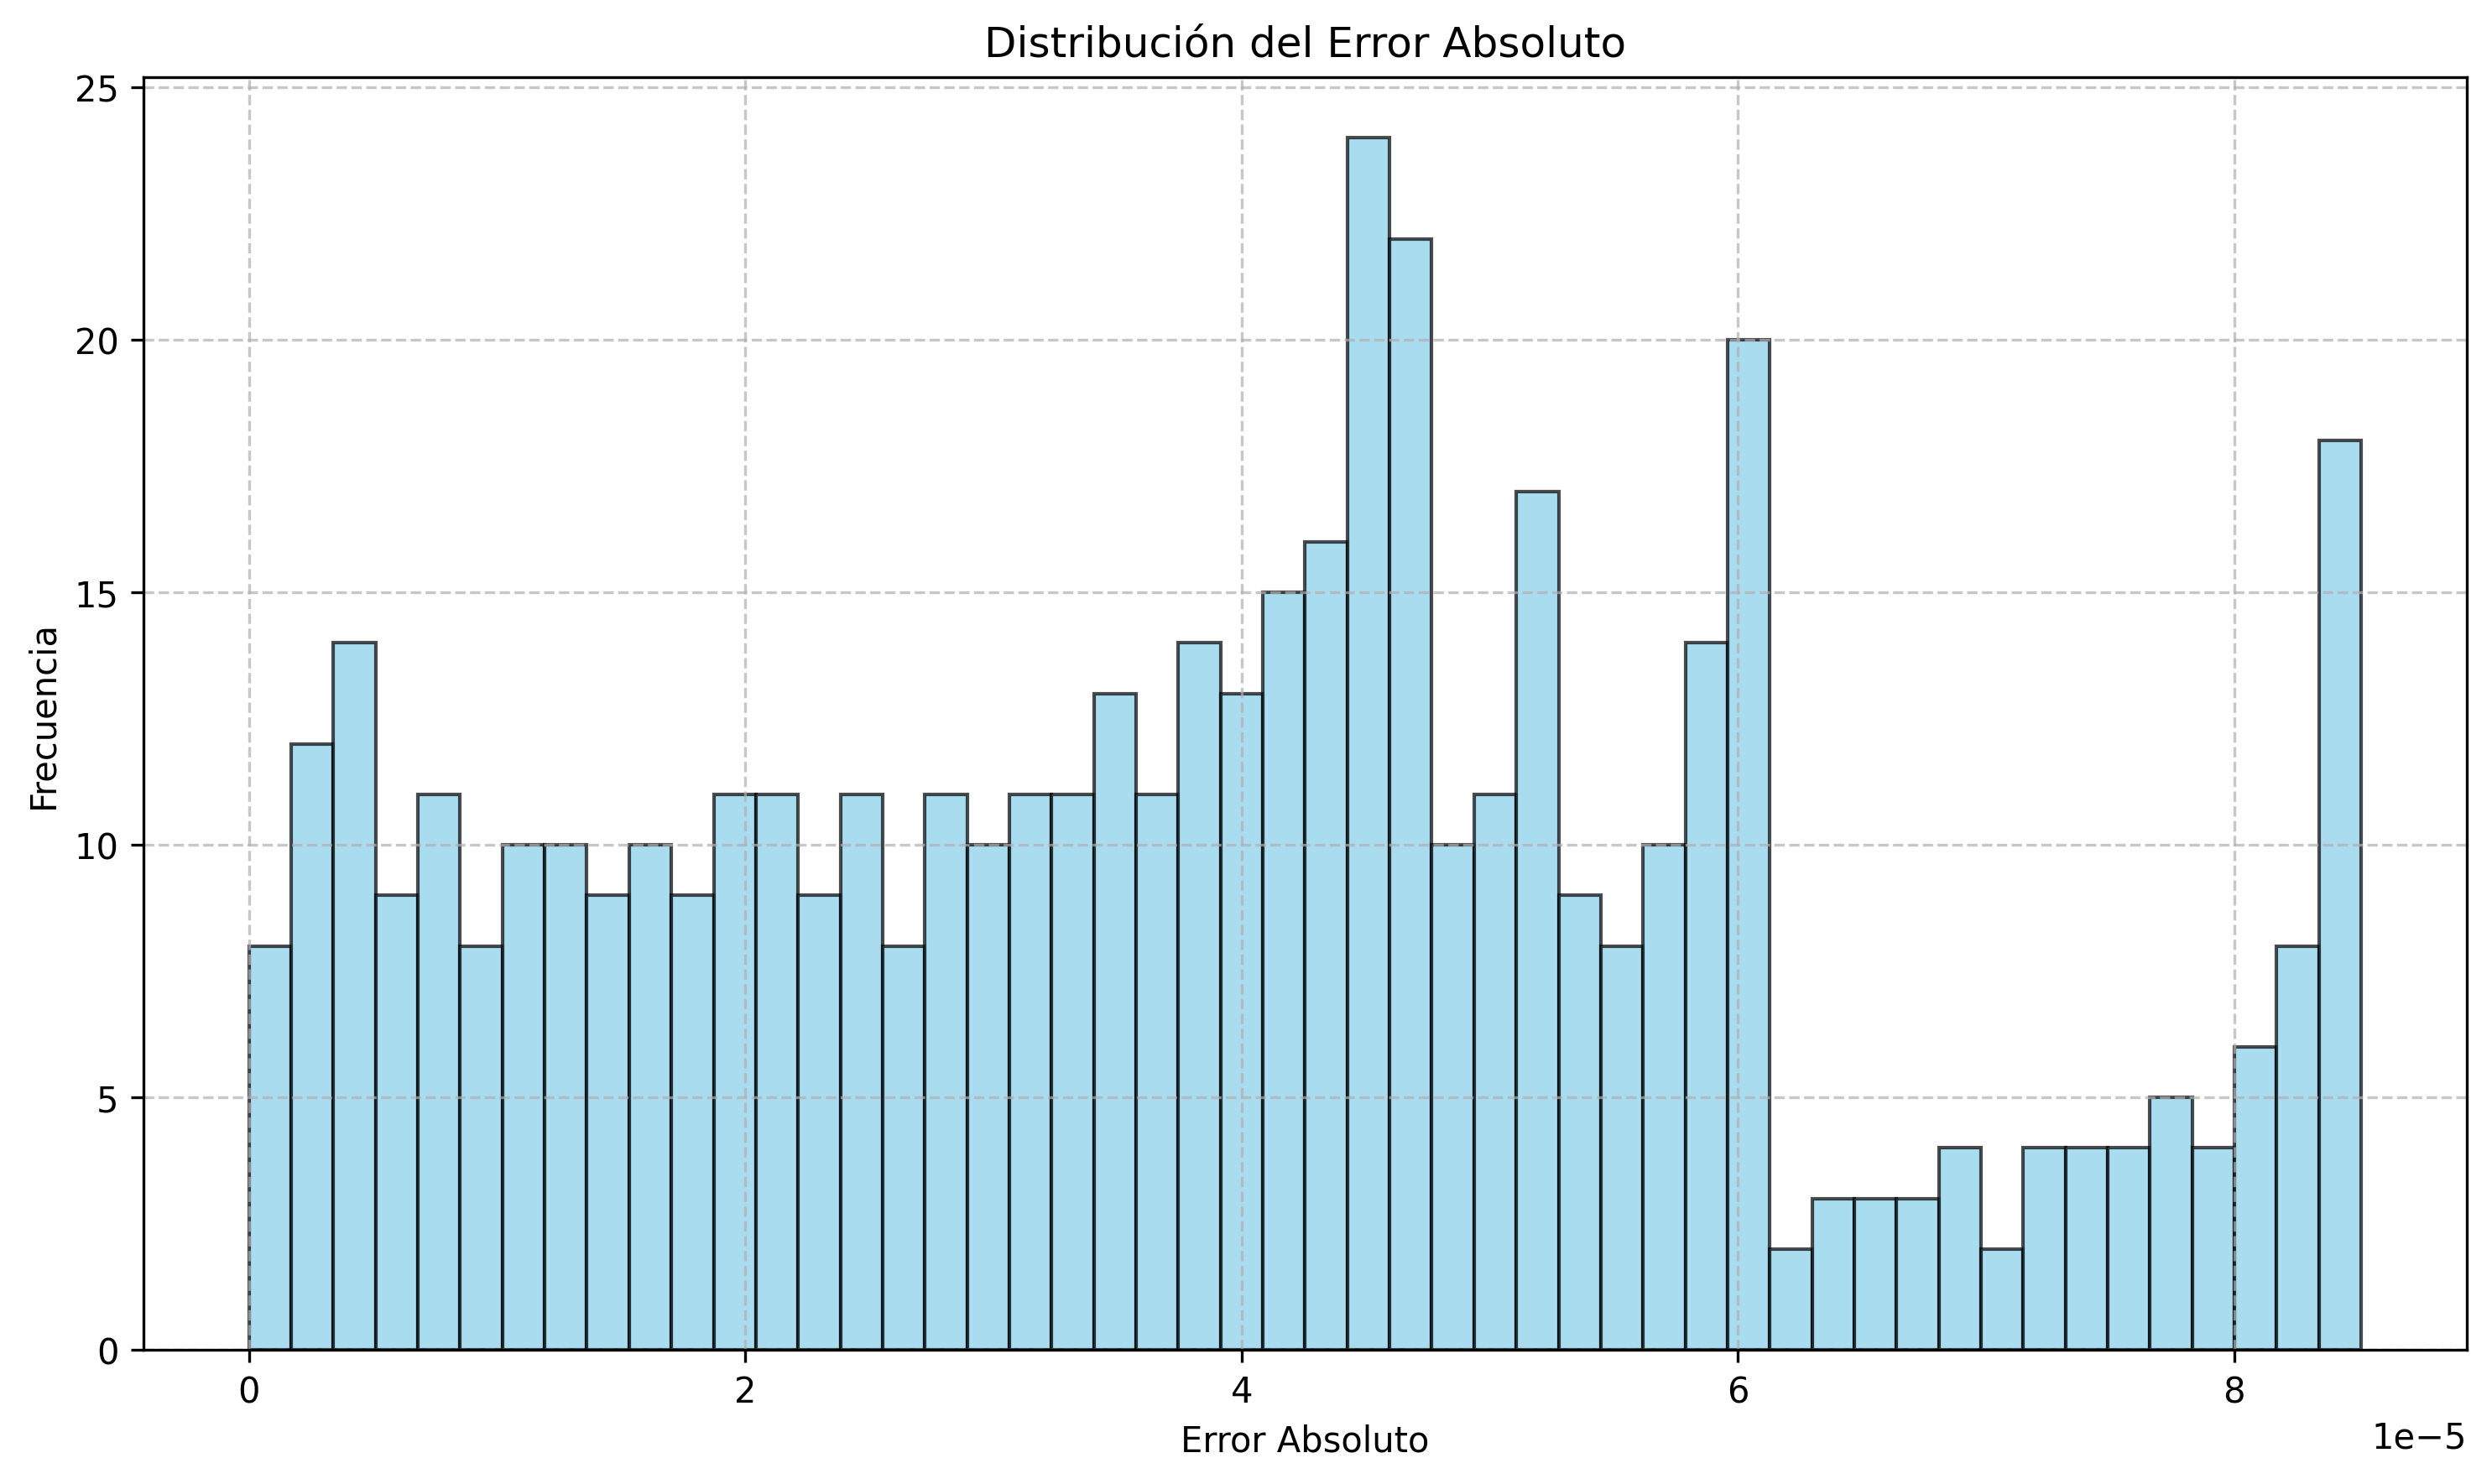

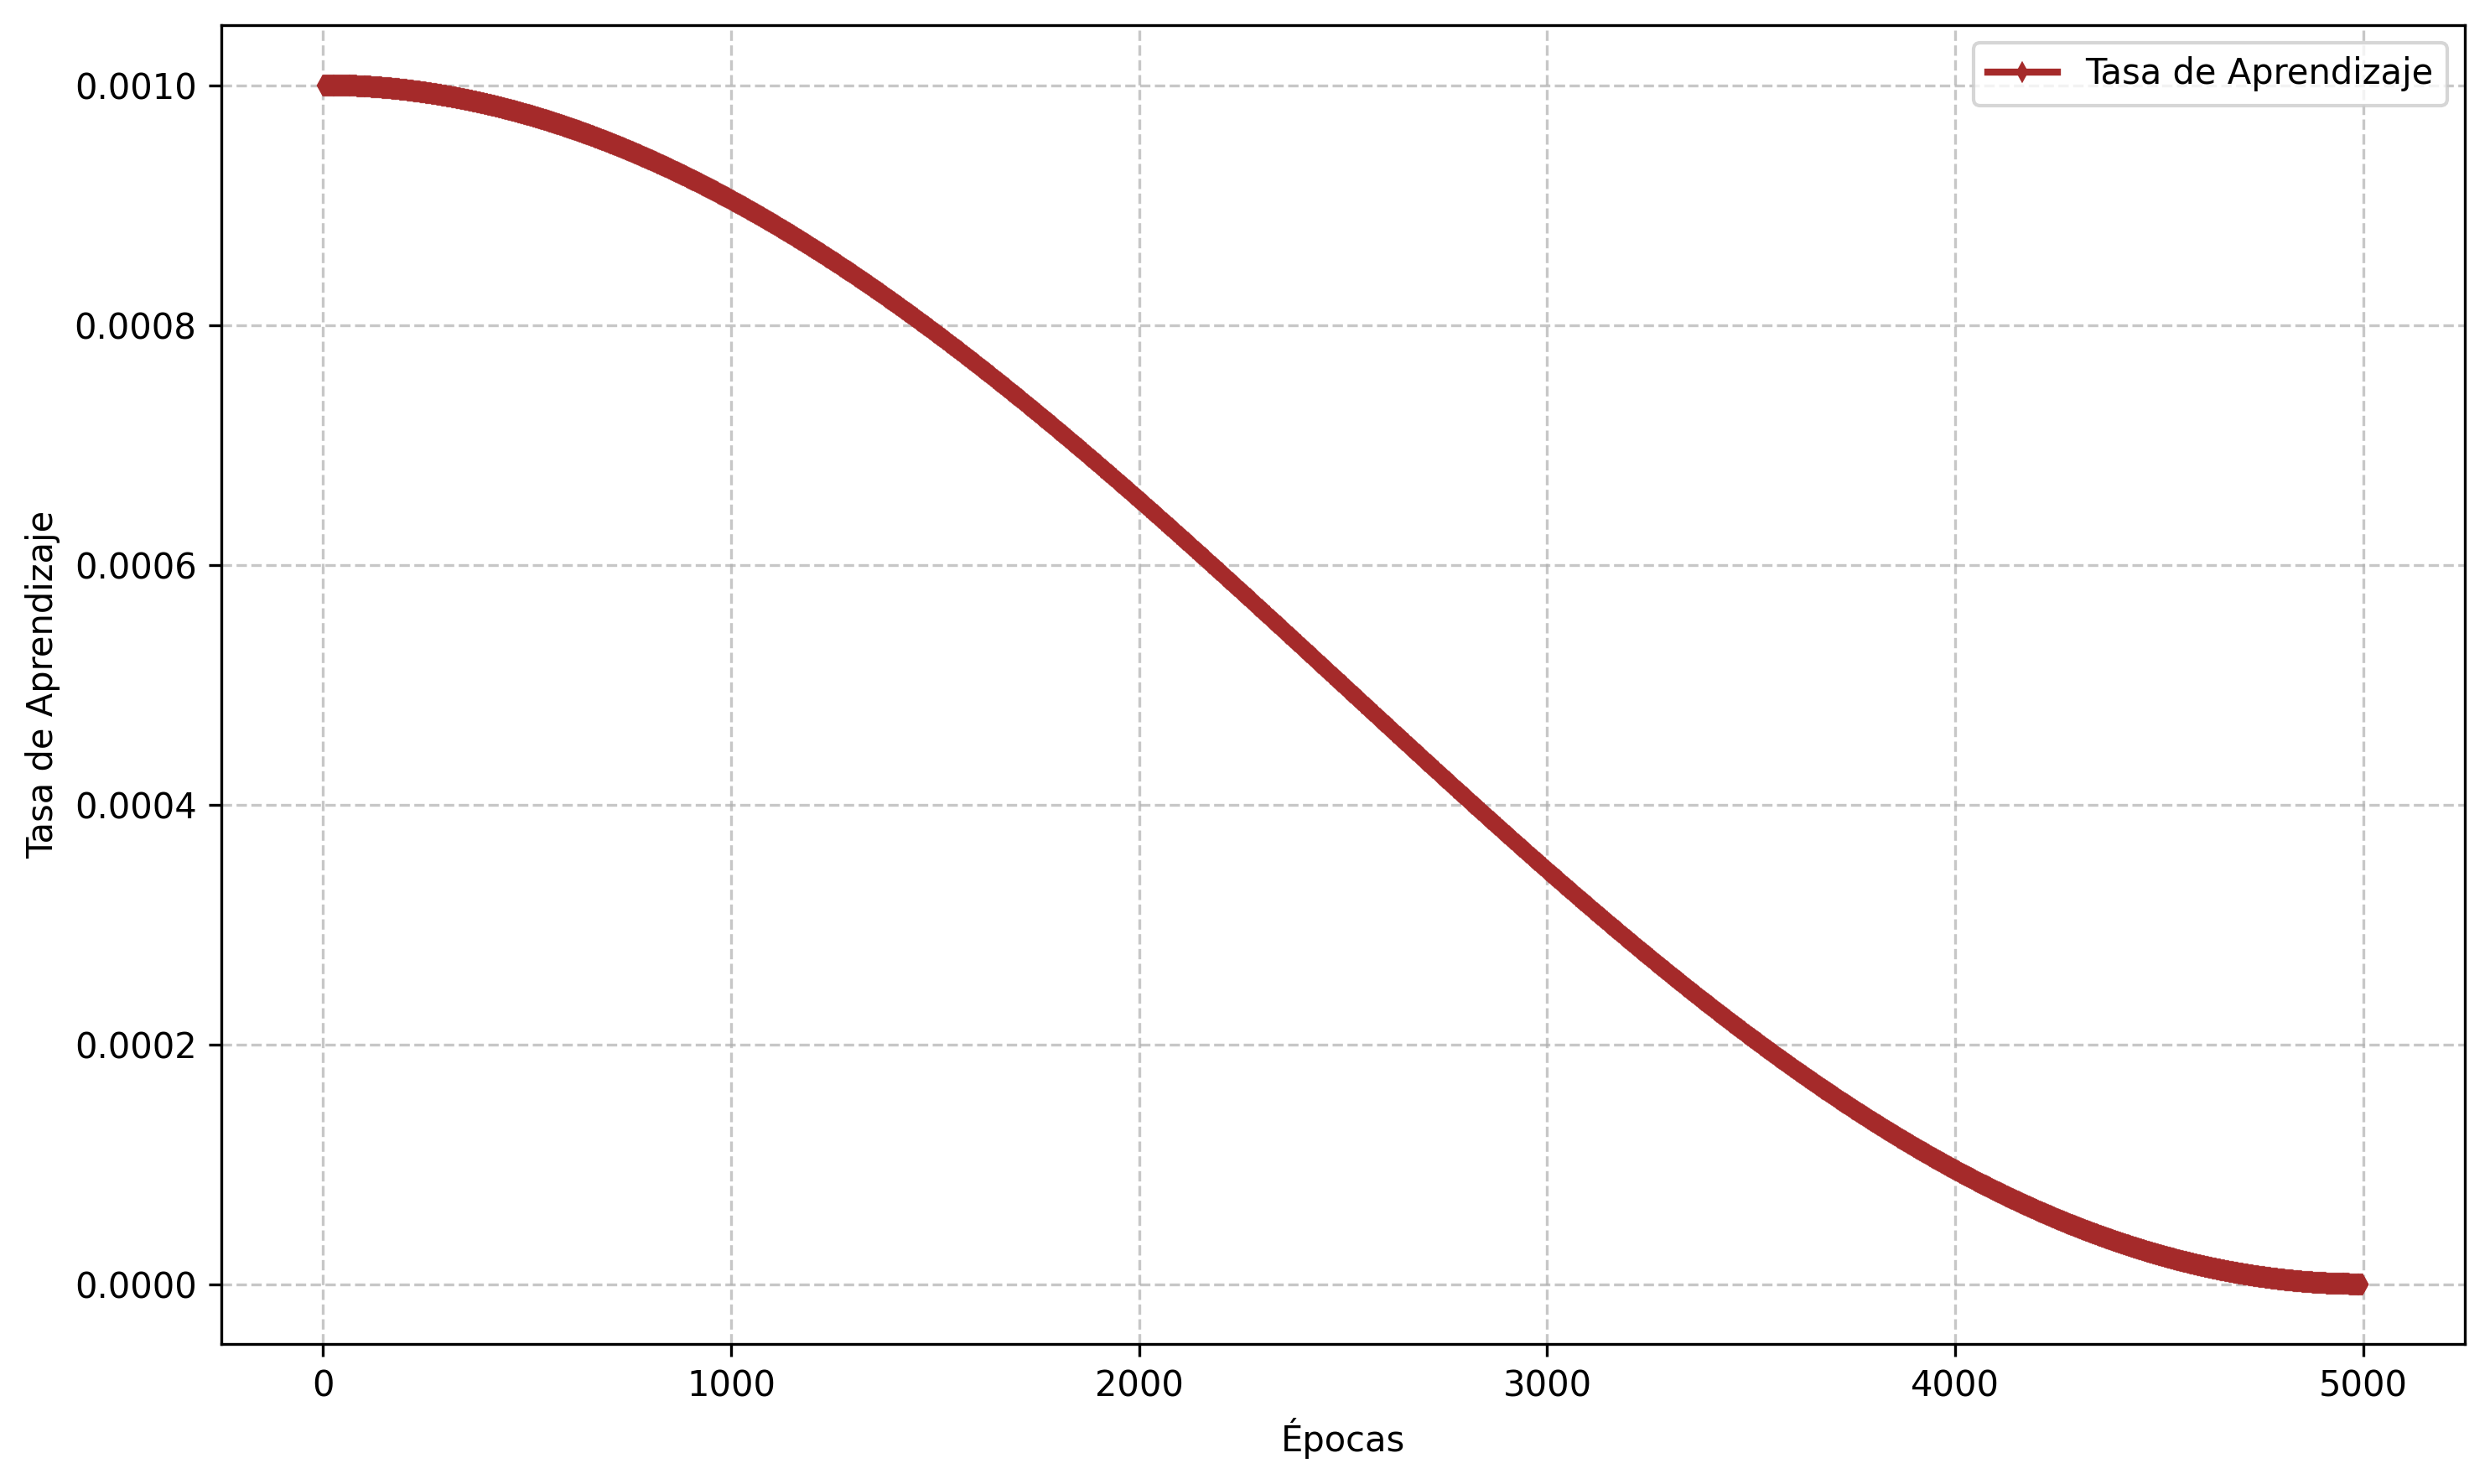

In [ ]:
"""
SOLUCIÓN DE ECUACIONES DIFERENCIALES CON REDES NEURONALES
Ejemplo: Ecuación diferencial ordinaria

Este código implementa una red neuronal para aproximar soluciones de EDOs
utilizando el método de Physics-Informed Neural Networks (PINNs). Se evalúan
las métricas MAE, MSE y el error máximo absoluto, y se generan diversas gráficas,
incluido un histograma que muestra la distribución de los errores.
"""

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import os

# Crear directorio para guardar resultados si no existe
output_dir = "resultados_pinn"
os.makedirs(output_dir, exist_ok=True)

# =====================================================
# CONFIGURACIÓN DEL PROBLEMA (MODIFICAR PARA NUEVAS ECUACIONES)
# =====================================================
# Parámetros físicos
r = 2           # Parámetro de la ecuación diferencial
P0 = 1.0        # Valor inicial
t_max = 0    # Tiempo máximo de simulación

# Parámetros de entrenamiento
n_points = 100   # Puntos de colocación
epochs = 5000    # Número de épocas
hidden_layers = [32, 32]  # Capas ocultas de la red
activation = nn.Tanh  # Función de activación (puede ser nn.Tanh o nn.GELU)

# Parámetros de optimización
learning_rate = 1e-3
print_freq = 500    # Frecuencia para imprimir resultados durante el entrenamiento

# =====================================================
# SOLUCIÓN ANALÍTICA (MODIFICAR PARA NUEVAS ECUACIONES)
# =====================================================
def analytic_solution(t):
    """
    Calcula la solución exacta de la EDO: dy/dx + 2xy = 0
    La solución exacta es: y(x) = e^(-x^2)

    Args:
        t (torch.Tensor): Tensor de tiempos.

    Returns:
        torch.Tensor: Solución exacta.
    """
    return torch.exp(-t**2)

# =====================================================
# ARQUITECTURA DE LA RED NEURONAL (MODULAR)
# =====================================================
class PINN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers, activation):
        """
        Define la red neuronal para aproximar la solución de la EDO.

        Args:
            input_dim (int): Dimensión de entrada (por ejemplo, 1 para el tiempo).
            output_dim (int): Dimensión de salida (por ejemplo, 1 para la solución escalar).
            hidden_layers (list): Lista que define el número de neuronas en cada capa oculta.
            activation (nn.Module): Función de activación (ej. nn.Tanh).
        """
        super().__init__()
        layers = []
        in_features = input_dim

        # Construcción de las capas ocultas
        for layer in hidden_layers:
            layers.append(nn.Linear(in_features, layer))
            layers.append(activation())
            in_features = layer

        # Capa de salida
        layers.append(nn.Linear(in_features, output_dim))
        self.network = nn.Sequential(*layers)

        # Inicialización de pesos para mejorar la convergencia
        self._initialize_weights()

    def _initialize_weights(self):
        """
        Inicializa los pesos de las capas lineales utilizando la inicialización de Xavier,
        y establece los sesgos a cero.
        """
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_normal_(module.weight)
                nn.init.zeros_(module.bias)

    def forward(self, t):
        """
        Propagación hacia adelante de la red.

        Args:
            t (torch.Tensor): Tensor de tiempos.

        Returns:
            torch.Tensor: Salida de la red.
        """
        return self.network(t)

# =====================================================
# FUNCIÓN DE PÉRDIDA (ADAPTAR PARA NUEVAS ECUACIONES)
# =====================================================
def compute_loss(model, t):
    """
    Calcula la pérdida basada en el residuo de la EDO:
      dy/dx + 2xy = 0.
    Se usa el error cuadrático medio del residuo.

    Args:
        model (PINN): Red neuronal.
        t (torch.Tensor): Puntos de tiempo de entrenamiento.

    Returns:
        torch.Tensor: Valor de la pérdida.
    """
    # Calcula la solución de prueba que garantiza la condición inicial y(0)=1
    y_pred = trial_solution(t, model)

    # Calcula la derivada dy/dx usando autograd
    dy_dx = torch.autograd.grad(y_pred.sum(), t, create_graph=True, retain_graph=True)[0]

    # Define el residuo de la EDO
    residual = dy_dx + 2 * t * y_pred

    # Retorna el error cuadrático medio del residuo
    return torch.mean(residual**2)

# =====================================================
# SOLUCIÓN DE PRUEBA (MÉTODO DE LAGARIS)
# =====================================================
def trial_solution(t, model):
    """
    Define la solución de prueba que cumple la condición inicial y(0)=1.

    Args:
        t (torch.Tensor): Tensor de tiempos.
        model (PINN): Red neuronal.

    Returns:
        torch.Tensor: Solución de prueba.
    """
    return 1 + t * model(t)

# =====================================================
# FUNCIONES DE EVALUACIÓN DEL MODELO
# =====================================================
def evaluate_model(model, t_eval):
    """
    Evalúa el modelo y calcula tres métricas de error:
      - MAE: Error medio absoluto.
      - MSE: Error cuadrático medio.
      - Error Máximo Absoluto: Error máximo absoluto (en el peor caso).

    Args:
        model (PINN): Modelo entrenado.
        t_eval (torch.Tensor): Puntos de evaluación.

    Returns:
        tuple: (y_pred, y_exact, mae, mse, max_abs_error)
    """
    with torch.no_grad():
        # Calcula la solución exacta y la solución predicha
        y_exact = analytic_solution(t_eval)
        y_pred = trial_solution(t_eval, model)

        # Calcula el MAE (mean absolute error)
        mae = torch.mean(torch.abs(y_pred - y_exact)).item()
        # Calcula el MSE (mean squared error)
        mse = torch.mean((y_pred - y_exact)**2).item()
        # Calcula el error máximo absoluto (el peor error en el dominio evaluado)
        max_abs_error = torch.max(torch.abs(y_pred - y_exact)).item()

        return y_pred, y_exact, mae, mse, max_abs_error

# =====================================================
# CONFIGURACIÓN DEL ENTRENAMIENTO
# =====================================================
# Establece la semilla para la reproducibilidad de resultados
torch.manual_seed(42)
np.random.seed(42)

# Define los puntos de entrenamiento (colocación) en el intervalo [0, t_max]
t_collocation = torch.linspace(0, t_max, n_points).reshape(-1, 1)
t_collocation.requires_grad_(True)  # Necesario para calcular derivadas

# Inicializa el modelo PINN
model = PINN(
    input_dim=1,
    output_dim=1,
    hidden_layers=hidden_layers,
    activation=activation
)

# Define el optimizador (Adam) y un scheduler para ajustar la tasa de aprendizaje
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# Listas para almacenar las métricas durante el entrenamiento
start_time = time.time()
loss_history = []
mae_history = []
mse_history = []
max_abs_error_history = []  # Lista para almacenar el error máximo absoluto
lr_history = []

# =====================================================
# ENTRENAMIENTO
# =====================================================
print("\n===== INICIANDO ENTRENAMIENTO =====")
for epoch in tqdm(range(epochs), desc="Entrenamiento"):
    # Realiza el paso de optimización
    optimizer.zero_grad()
    loss = compute_loss(model, t_collocation)
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Guarda la tasa de aprendizaje actual
    lr_history.append(optimizer.param_groups[0]['lr'])

    # Evalúa el modelo en puntos de alta resolución para obtener las métricas
    with torch.no_grad():
        t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1)
        y_pred, y_exact, mae, mse, max_abs_error = evaluate_model(model, t_fine)

        # Guarda las métricas en cada época
        loss_history.append(loss.item())
        mae_history.append(mae)
        mse_history.append(mse)
        max_abs_error_history.append(max_abs_error)

# Tiempo total de entrenamiento
elapsed_time = time.time() - start_time

# =====================================================
# EVALUACIÓN Y RESULTADOS FINALES
# =====================================================
# Se evalúa el modelo final en una malla fina para obtener las soluciones y errores
t_fine = torch.linspace(0, t_max, 500).reshape(-1, 1)
y_pred, y_exact, final_mae, final_mse, final_max_abs_error = evaluate_model(model, t_fine)

# Convertir tensores a arrays de NumPy para facilitar la graficación
t_np = t_fine.detach().numpy()
y_exact_np = y_exact.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Tabla de errores finales para análisis
error_table = pd.DataFrame({
    "Métrica": ["MAE", "MSE", "Error Máx Absoluto"],
    "Valor Final": [final_mae, final_mse, final_max_abs_error],
    "Promedio (últimas 100 épocas)": [
        np.mean(mae_history[-100:]),
        np.mean(mse_history[-100:]),
        np.mean(max_abs_error_history[-100:])
    ]
})

# Gráfica 1: Solución Predicha vs. Solución Analítica
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(t_np, y_exact_np, label="Analítica", color="navy", lw=2)
plt.plot(t_np, y_pred_np, '--', label="PINN", color="orange", lw=2)
plt.xlabel("Tiempo (s)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/solucion.png", bbox_inches="tight")

# Gráfica 2: Comparación de MAE y MSE
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(mae_history, label="MAE (Error Medio Absoluto)", color="orange", lw=2, marker='o', markersize=3)
plt.plot(mse_history, label="MSE (Error Cuadrático Medio)", color="green", lw=2, marker='s', markersize=3)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/mae_mse_comparacion.png", bbox_inches="tight")

# Gráfica 3: Convergencia de la Pérdida
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(loss_history, color="purple", lw=2)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/convergencia_perdida.png", bbox_inches="tight")

# Gráfica 4: Error Máximo Absoluto a lo largo del entrenamiento
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(max_abs_error_history, color="red", lw=2, marker='x', markersize=5)
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Error Máximo Absoluto")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/error_maximo.png", bbox_inches="tight")

# Gráfica 5: Distribución del Error Absoluto
plt.figure(figsize=(10, 6), dpi=300)
error_abs = np.abs(y_pred_np - y_exact_np)
plt.hist(error_abs, bins=50, color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Error Absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución del Error Absoluto")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/distribucion_error.png", bbox_inches="tight")

# Gráfica 6: Evolución de la Tasa de Aprendizaje
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(lr_history, label="Tasa de Aprendizaje", color="brown", lw=2, marker='d', markersize=3)
plt.xlabel("Épocas")
plt.ylabel("Tasa de Aprendizaje")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/tasa_aprendizaje.png", bbox_inches="tight")

# Mostrar resultados finales
print(f"\nTiempo de entrenamiento: {elapsed_time:.2f} segundos.")
print(f"Error final MAE: {final_mae:.4e}")
print(f"Error final MSE: {final_mse:.4e}")
print(f"Error máximo absoluto: {final_max_abs_error:.4e}")
print("\nTabla de resultados finales:")
print(error_table)

